# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-and-setup-data" data-toc-modified-id="Import-and-setup-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and setup data</a></div><div class="lev1 toc-item"><a href="#Breakdown-by-time" data-toc-modified-id="Breakdown-by-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Breakdown by time</a></div><div class="lev1 toc-item"><a href="#Overview" data-toc-modified-id="Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overview</a></div><div class="lev2 toc-item"><a href="#Behavior" data-toc-modified-id="Behavior-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Behavior</a></div><div class="lev2 toc-item"><a href="#Neural-activity" data-toc-modified-id="Neural-activity-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Neural activity</a></div><div class="lev1 toc-item"><a href="#Grouping" data-toc-modified-id="Grouping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Grouping</a></div><div class="lev1 toc-item"><a href="#Correlation" data-toc-modified-id="Correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation</a></div><div class="lev1 toc-item"><a href="#GLM" data-toc-modified-id="GLM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>GLM</a></div><div class="lev3 toc-item"><a href="#Linear-regression" data-toc-modified-id="Linear-regression-601"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Linear regression</a></div><div class="lev1 toc-item"><a href="#Cluster-analysis" data-toc-modified-id="Cluster-analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cluster analysis</a></div><div class="lev1 toc-item"><a href="#Neuron-correlations" data-toc-modified-id="Neuron-correlations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Neuron correlations</a></div><div class="lev1 toc-item"><a href="#Old" data-toc-modified-id="Old-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Old</a></div><div class="lev1 toc-item"><a href="#Classify-by-response-to-TMT" data-toc-modified-id="Classify-by-response-to-TMT-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Classify by response to TMT</a></div><div class="lev2 toc-item"><a href="#Test" data-toc-modified-id="Test-101"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Test</a></div><div class="lev2 toc-item"><a href="#Statistics" data-toc-modified-id="Statistics-102"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Statistics</a></div><div class="lev1 toc-item"><a href="#STOP-HERE" data-toc-modified-id="STOP-HERE-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>STOP HERE</a></div><div class="lev2 toc-item"><a href="#Cluster-analysis" data-toc-modified-id="Cluster-analysis-111"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Cluster analysis</a></div><div class="lev2 toc-item"><a href="#Model-neural-dynamics" data-toc-modified-id="Model-neural-dynamics-112"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Model neural dynamics</a></div><div class="lev3 toc-item"><a href="#Feature-selection" data-toc-modified-id="Feature-selection-1121"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>Feature selection</a></div><div class="lev3 toc-item"><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1122"><span class="toc-item-num">11.2.2&nbsp;&nbsp;</span>Linear regression</a></div><div class="lev3 toc-item"><a href="#Review-model" data-toc-modified-id="Review-model-1123"><span class="toc-item-num">11.2.3&nbsp;&nbsp;</span>Review model</a></div><div class="lev3 toc-item"><a href="#Reduce-dimensionality-in-coefficients" data-toc-modified-id="Reduce-dimensionality-in-coefficients-1124"><span class="toc-item-num">11.2.4&nbsp;&nbsp;</span>Reduce dimensionality in coefficients</a></div><div class="lev3 toc-item"><a href="#Cluster-by-coefficients" data-toc-modified-id="Cluster-by-coefficients-1125"><span class="toc-item-num">11.2.5&nbsp;&nbsp;</span>Cluster by coefficients</a></div><div class="lev2 toc-item"><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-113"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Logistic regression</a></div><div class="lev3 toc-item"><a href="#Calculate-statistics" data-toc-modified-id="Calculate-statistics-1131"><span class="toc-item-num">11.3.1&nbsp;&nbsp;</span>Calculate statistics</a></div>

TO-DO
- ANOVA or something to epochs across clusters
- LR compare epochs
- LR water outliers
- LR example trace showing effect of behavior on activity
- LR look at perievent activity. Bin continuous variables.
- How to deal with epoch transition: where do frames go?
- Escape behavior: move within 2 s, from 'odor zone' (20 % of max distance from point) to 80 %

In [1]:
# Import packages

# % load_ext rpy2.ipython
% load_ext autoreload
% matplotlib inline
# % matplotlib
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import scipy.stats
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.stats.anova as anova
import scipy.stats
import scipy.signal
import custom
from utilities import *
import pdb

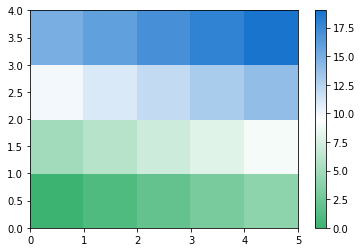

In [2]:
cmap = custom.diverging_cmap(np.array([60, 179, 113])/255., np.array([24, 116, 205])/255.)
plt.pcolor(np.arange(20).reshape(4, 5), cmap=cmap)
plt.colorbar()

In [3]:
# Output paramters

output_dir = './data/homecage'
opts_fig = {
    'dpi': 300,
    'frameon': False,
    'bbox_inches': 'tight',
    'transparent': True
}

if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

# Import and setup data
- Normalize data

In [4]:
# Parameters
odor_pnt = 'PNT'
odor_tmt = 'TMT'
color = {odor_tmt: 'goldenrod', odor_pnt: 'forestgreen'}
filename = './data/homecage.h5'

In [5]:
# Import data and delete bad cells

with pd.HDFStore(filename, mode='r') as hf:
    neural_f = hf['neural'].loc[:, ('Traces', slice(None), slice(None), 'A')]
    neural_s = hf['neural'].loc[:, ('Spikes', slice(None), slice(None), 'A')]
    behav = hf['behav'].loc[:, (slice(None), slice(None), 'A')]
    
    # Clean up
    neural_f.columns = neural_f.columns.droplevel(['datatype', 'order'])
    neural_s.columns = neural_s.columns.droplevel(['datatype', 'order'])
    behav.columns = behav.columns.droplevel(['order'])

~~Normalize data by subtracting mean and dividing standard deviation within each neuron/subject. Statistics are calculated across all epochs. <br>
Then subtract water exposure.~~

Normalize by std of water exposure within each neuron. Keep 0 at 0 (no centering).
Std chosen (vs mean or other) bc actual "fluorescence" value doesn't mean much. Keeping 0 bc it has a "strong" meaning with CNMF as baseline??

In [6]:
# Normalize imaging data
neural_norm = neural_f * (1 / neural_f.loc['h2o'].std())     # Kernel kept dying if simply divide by `base_std`

# Remove cells with no activity/std in baseline
neural_norm = neural_norm.replace([np.inf, -np.inf], np.nan)
neural_norm = neural_norm.dropna(axis=1, how='all')

# Remove cell bc it has no activity in baseline when cut to 1 min
neural_norm = neural_norm.drop([('H123', 'TMT', 11), ('H188', 'PNT', 46), ('J54', 'PNT', 25)], axis=1)

n_cells = {
    odor_tmt: neural_norm.loc[:, (slice(None), odor_tmt)].shape[1],
    odor_pnt: neural_norm.loc[:, (slice(None), odor_pnt)].shape[1]
}

# Breakdown by time

In [7]:
# Define epochs
ts_neural = neural_norm.reset_index(level='time')['time'].as_matrix()
time_epochs_neural = [
    '0-1' if x < 60000 else
    '1-2' if x < 120000 else
    '2-3' if x < 180000 else
    '3-4' if x < 240000 else
    '4-5'
    for x in ts_neural
]

ts_behav = behav.reset_index(level='timestamp')['timestamp'].as_matrix()
time_epochs_behav = [
    '0-1' if x < 60000 else
    '1-2' if x < 120000 else
    '2-3' if x < 180000 else
    '3-4' if x < 240000 else
    '4-5'
    for x in ts_behav
]

# Add time_epochs
neural_norm_epoched = neural_norm.copy()
neural_norm_epoched['time_epoch'] = time_epochs_neural
neural_norm_epoched = neural_norm_epoched.set_index('time_epoch', append=True)
neural_epoch_mean = neural_norm_epoched.mean(axis=0, level=['epoch', 'time_epoch'])
neural_epoch_mean2 = neural_epoch_mean.T.stack().stack().reset_index().rename(columns={0: 'neural'})

behav_epoched = behav.copy()
behav_epoched['time_epoch'] = time_epochs_behav
behav_epoched = behav_epoched.set_index('time_epoch', append=True)

Saved ./data/homecage\neural_over_time.png
Saved ./data/homecage\neural_over_time.svg


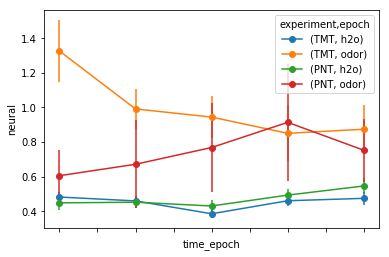

In [8]:
plt_name = 'neural_over_time'

fig, ax = plt.subplots()
data = neural_epoch_mean.loc[['h2o', 'odor']].unstack('epoch')
Y = data.mean(axis=1, level=['experiment', 'epoch'])
E = data.sem(axis=1, level=['experiment', 'epoch'])
Y.plot(ax=ax, yerr=E, marker='o')
ax.set_ylabel('neural')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if plt_name:
    savefig(os.path.join(output_dir, plt_name) + '.png', fig)
    savefig(os.path.join(output_dir, plt_name) + '.svg', fig)

In [9]:
response_slice = slice(0, 59800)
behav_response = behav.loc[(slice(None), response_slice), :]
neural_response = neural_norm.loc[(slice(None), response_slice), :]

---
<a id='overview'></a>
# Overview

## Behavior

Saved ./data/homecage\behav_mean_by_epoch.png
Saved ./data/homecage\behav_mean_by_epoch.svg


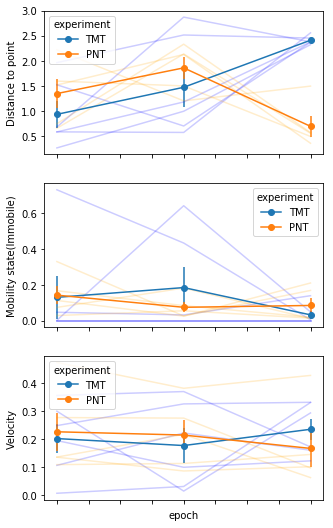

In [10]:
# Plot behavior by epochs and odor

plt_name = 'behav_mean_by_epoch'

features = ['Distance to point', 'Mobility state(Immobile)', 'Velocity']
behav_mean_by_epoch = behav_response.loc[:, (slice(None), slice(None), features)].mean(axis=0, level='epoch')

fig, axes = plt.subplots(nrows=len(features), sharex=True, figsize=(5, 9))
for feature, ax in zip(features, axes):
    data = behav_mean_by_epoch.loc[:, (slice(None), slice(None), feature)]
    Y = data.mean(axis=1, level='experiment')
    E = data.sem(axis=1, level='experiment')

    # Plot
    Y.plot(ax=ax, yerr=E, marker='o')
    ax.plot(data.xs('TMT', axis=1, level='experiment').as_matrix(), color='blue', alpha=0.2)
    ax.plot(data.xs('PNT', axis=1, level='experiment').as_matrix(), color='orange', alpha=0.2)
    ax.set_ylabel(feature)

# Save
if plt_name:
    savefig(os.path.join(output_dir, plt_name) + '.png', fig)
    savefig(os.path.join(output_dir, plt_name) + '.svg', fig)
    behav_mean_by_epoch.to_csv(os.path.join(output_dir, plt_name) + '.csv')

## Neural activity

Saved ./data/homecage\sample_trace.png
Saved ./data/homecage\sample_trace.svg


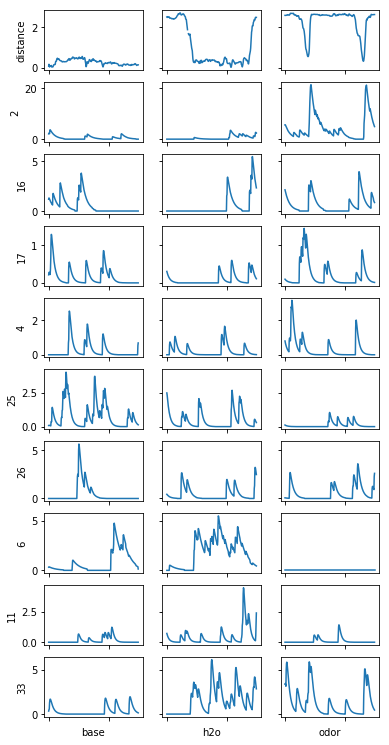

In [11]:
plt_name = 'sample_trace'

def plot_sample(X, axes):
    for ax, (epoch, df) in zip(axes, X.groupby(axis=0, level='epoch')):
        df.plot(ax=ax, legend=False)
        ax.set_xlabel(epoch)

subj = 'H186'
neurons = [
    2, 16, 17,
    4, 25, 26,
    6, 11, 33,
]

fig, axes = plt.subplots(nrows=10, ncols=3, sharex=True, sharey='row', figsize=(6, 13))
plot_sample(behav_response.loc[:, (subj, 'TMT', 'Distance to point')], axes[0])

for n, (sub_ax, neur) in enumerate(zip(axes[1:, :], neurons)):
    plot_sample(neural_response.loc[:, (subj, 'TMT', neur)], sub_ax)
    sub_ax[0].set_ylabel(neur)

axes[0, 0].set_ylabel('distance')

if plt_name:
    savefig(os.path.join(output_dir, plt_name + '.png'), fig)
    savefig(os.path.join(output_dir, plt_name + '.svg'), fig)

Saved ./data/homecage\homecage-neural-TMT_cb.svg


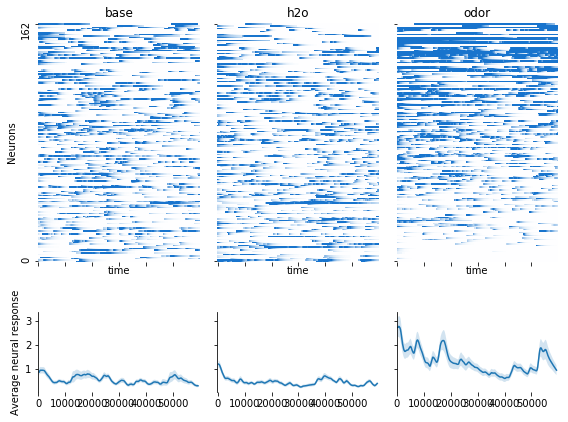

Saved ./data/homecage\homecage-neural-TMT.png
Saved ./data/homecage\homecage-neural-TMT.svg
Saved ./data/homecage\homecage-neural-PNT_cb.svg


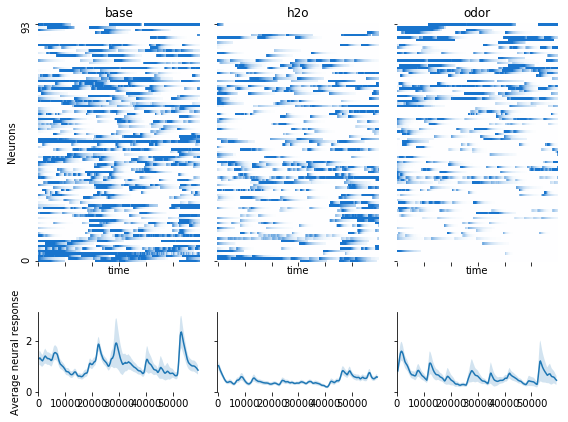

Saved ./data/homecage\homecage-neural-PNT.png
Saved ./data/homecage\homecage-neural-PNT.svg


In [13]:
# Plot individual cell activity heatmap and averages by epoch

def activity_heatmap(data, plt_name, max_z=2):
    fig, axes  = plt.subplots(2, 3, sharex=True, sharey='row', gridspec_kw={'height_ratios':[3, 1]}, figsize=(8, 6))
    fig_cb, ax_cb = plt.subplots(figsize=(0.25, 4))

    ims = []
    for n, (grp, df) in enumerate(data.groupby(axis=0, level='epoch')):
        df.index = df.index.droplevel('epoch')
        
        # Plot heatmap
        C = df
        C.columns = np.arange(C.shape[1])
        sns.heatmap(C.T, ax=axes[0, n], cbar_ax=ax_cb, cmap=cmap, vmin=-max_z, vmax=max_z, xticklabels=50, yticklabels=C.shape[1] - 1)
        axes[0, n].invert_yaxis()
        axes[0, n].set_title(grp)
        ims.append(axes[0, n].collections[0])

        # Plot mean trace
        Y = df.mean(axis=1).rolling(5, center=True).mean().as_matrix()
        E = df.sem(axis=1).rolling(5, center=True).mean().as_matrix()
        axes[1, n].plot(Y)
        X = axes[1, n].lines[0].get_xdata()
        axes[1, n].fill_between(X, Y + E, Y - E, alpha=0.2)
        
        # Remove spines
        axes[0, n].spines['top'].set_visible(False)
        axes[0, n].spines['right'].set_visible(False)
        axes[0, n].spines['bottom'].set_visible(False)
        axes[0, n].spines['left'].set_visible(False)
        axes[1, n].spines['top'].set_visible(False)
        axes[1, n].spines['right'].set_visible(False)
        axes[1, n].spines['bottom'].set_visible(False)

    axes[0, 0].set_ylabel('Neurons');
    axes[1, 0].set_ylabel('Average neural response');
    
    # Save colorbar
    if plt_name: savefig(plt_name + '_cb.svg', fig_cb)
    plt.close(fig_cb)
    
    fig.tight_layout()
    plt.show()
    if plt_name:
        savefig(plt_name + '.png', fig)
        for im in ims: im.remove()
        savefig(plt_name + '.svg', fig)
    
    return fig

# Sorting
sort_metric = [
    neural_norm.loc['odor', (slice(None), odor_tmt)].mean(),
    neural_norm.loc['odor', (slice(None), odor_pnt)].mean()
]
sort_ix = {
    odor_tmt: np.argsort(sort_metric[0].as_matrix()),
    odor_pnt: np.argsort(sort_metric[1].as_matrix())
}

for stim in [odor_tmt, odor_pnt]:
    data = neural_response.xs(stim, axis=1, level='experiment').iloc[:, sort_ix[stim]]
    plt_name = os.path.join(output_dir, 'homecage-neural-{}'.format(stim))
    fig = activity_heatmap(data, plt_name)

In [ ]:
# Re-parameterize signal...

plt_name = 'neural_distribution'
plt_name = ''

temp_data = neural_response.loc[(['h2o', 'odor']), :].unstack('epoch')
n_cols = temp_data.shape[1]
peaks = scipy.signal.argrelextrema(temp_data.as_matrix(), np.greater)
peak_ct = [(peaks[1] == n).sum() for n in range(n_cols)]
neural_new = pd.concat(
    [
        temp_data.mean(),
        temp_data.var(),
        pd.Series(peak_ct, index=temp_data.columns),
    ],
    axis=1, keys=['mean', 'variance', 'peaks']
)

fig, axes = plt.subplots(ncols=2, sharey=True)
colors = 'rgmk'
markers = 'ooxx'
for n, (group, df) in enumerate(neural_new.groupby(level=['experiment', 'epoch'])):
    df.plot.scatter(ax=axes[0], x='mean', y='peaks', color=colors[n], marker=markers[n], label=group, s=5, alpha=0.6);
#     custom.cdf(df['mean'].as_matrix(), ax=axes[0], label=', '.join(group));
#     custom.cdf(df['peaks'].as_matrix(), ax=axes[1], label=', '.join(group));
axes[0].set_xlabel('Mean fluorescence')
axes[1].set_xlabel('Number of peaks');
axes[0].set_ylabel('Proportion');
axes[1].legend();

fig2, axes2 = plt.subplots(ncols=2)
neural_new2 = neural_new.reset_index()
neural_new2['groups'] = [', '.join([a, b]) for a, b in zip(neural_new2['experiment'], neural_new2['epoch'])]
sns.violinplot(ax=axes2[0], data=neural_new2, x='groups', y='mean')
sns.violinplot(ax=axes2[1], data=neural_new2, x='groups', y='peaks')

if plt_name:
    savefig((os.path.join(output_dir, plt_name) + '.png').format(stim), fig)
    savefig((os.path.join(output_dir, plt_name) + '.svg').format(stim), fig)

Saved ./data/homecage\neural_mean_by_epoch.png
Saved ./data/homecage\neural_mean_by_epoch.svg


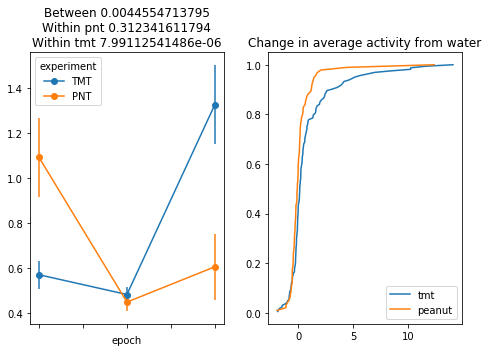

In [14]:
# Average by epochs

plt_name = 'neural_mean_by_epoch'


neural_cell_response = neural_response.loc[(slice(None), response_slice), slice(None)].mean(axis=0, level='epoch')
epoch_diff = neural_cell_response.loc['odor'] - neural_cell_response.loc['h2o']

# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(7, 5))
Y = neural_cell_response.mean(axis=1, level=['experiment'])
E = neural_cell_response.sem(axis=1, level=['experiment'])
Y.plot(ax=axes[0], yerr=E, marker='o')

custom.cdf(epoch_diff.loc[slice(None), 'TMT'].dropna(), ax=axes[1], label='tmt')
custom.cdf(epoch_diff.loc[slice(None), 'PNT'].dropna(), ax=axes[1], label='peanut')
axes[1].legend()
axes[1].set_title('Change in average activity from water')

_, p_bw_grp = scipy.stats.ttest_ind(epoch_diff.xs('TMT', level='experiment'), epoch_diff.xs('PNT', level='experiment'), equal_var=False)
_, p_wi_pnt = scipy.stats.ttest_rel(neural_cell_response.loc['odor', (slice(None), 'PNT')], neural_cell_response.loc['h2o', (slice(None), 'PNT')])
_, p_wi_tmt = scipy.stats.ttest_rel(neural_cell_response.loc['odor', (slice(None), 'TMT')], neural_cell_response.loc['h2o', (slice(None), 'TMT')])
axes[0].set_title('Between {}\nWithin pnt {}\nWithin tmt {}'.format(p_bw_grp, p_wi_pnt, p_wi_tmt))

fig.tight_layout()

if plt_name:
    savefig((os.path.join(output_dir, plt_name) + '.png').format(stim), fig)
    savefig((os.path.join(output_dir, plt_name) + '.svg').format(stim), fig)

NameError: name 'neural_new' is not defined

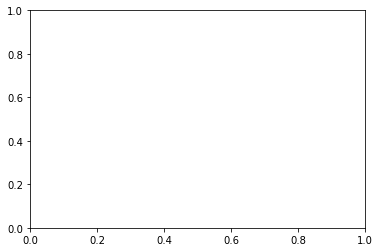

In [14]:
# Average by epochs

plt_name = 'neural_peaks_by_epoch'

# Plot data
fig, ax = plt.subplots()
Y = neural_new['peaks'].groupby(axis=0, level=['experiment', 'epoch']).mean().unstack('experiment')
E = neural_new['peaks'].groupby(axis=0, level=['experiment', 'epoch']).sem().unstack('experiment')
Y.plot(ax=ax, yerr=E, marker='o')

# _, p_bw_grp = scipy.stats.ttest_ind(epoch_diff.xs('TMT', level='experiment'), epoch_diff.xs('PNT', level='experiment'), equal_var=False)
# _, p_wi_pnt = scipy.stats.ttest_rel(neural_cell_response.loc['odor', (slice(None), 'PNT')], neural_cell_response.loc['h2o', (slice(None), 'PNT')])
# _, p_wi_tmt = scipy.stats.ttest_rel(neural_cell_response.loc['odor', (slice(None), 'TMT')], neural_cell_response.loc['h2o', (slice(None), 'TMT')])
# plt.title('Between {}\nWithin pnt {}\nWithin tmt {}'.format(p_bw_grp, p_wi_pnt, p_wi_tmt))

plt.tight_layout()

if plt_name:
    savefig((os.path.join(output_dir, plt_name) + '.png').format(stim), fig)
    savefig((os.path.join(output_dir, plt_name) + '.svg').format(stim), fig)

# Grouping

In [15]:
thresh_data = neural_response

n_neurons = thresh_data.shape[1]
alpha = 0.5
p_thresh = alpha / n_neurons

grouping = pd.DataFrame(index=['p', 'sign', 'group'], columns=thresh_data.columns)
for odor in ['TMT', 'PNT']:
    for n, neuron in enumerate(thresh_data):
        X = thresh_data.loc['h2o', neuron]
        Y = thresh_data.loc['odor', neuron]
        if not (len(np.unique(X)) == 1 and len(np.unique(Y)) == 1 and np.unique(X) == np.unique(Y)):
            _, grouping.loc[('p'), neuron] = scipy.stats.mannwhitneyu(X, Y)
            grouping.loc[('sign'), neuron] = np.sign(Y.mean() - X.mean())

            if grouping.loc[('p'), neuron] < p_thresh:
                grouping.loc[('group'), neuron] = grouping.loc[('sign'), neuron] 
            else:
                grouping.loc[('group'), neuron] = 0

Saved ./data/homecage\neural-grouping.png
Saved ./data/homecage\neural-grouping.svg


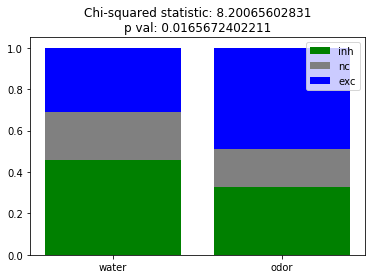

In [16]:
plt_name = 'neural-grouping'

response_counts = {exp: grouping.loc['group', (slice(None), exp)].value_counts() for exp in ['TMT', 'PNT']}

# fig, axes = plt.subplots(ncols=2)
# for ax, (ep, counts) in zip(axes, response_counts.iteritems()):
#     ax.set_title('Responses to {}'.format(ep))
#     counts.plot.pie(ax=ax, colors=['gray', np.array([60, 179, 113])/255., np.array([24, 116, 205])/255.], autopct='%1.1f%%', wedgeprops={'lw': 5, 'ec': 'w'})
#     ax.axis('image')
#     centre_circle = plt.Circle((0, 0), 1 / 1.4142, color='none', fc='white')
#     ax.add_artist(centre_circle);

resp = np.array([
    [response_counts['PNT'][-1], response_counts['TMT'][-1]],
    [response_counts['PNT'][0], response_counts['TMT'][0]],
    [response_counts['PNT'][1], response_counts['TMT'][1]],
])
Y = resp / resp.sum(axis=0, dtype=float)
chi, p, _, _ = scipy.stats.chi2_contingency(resp)

fig, ax = plt.subplots()
X = range(2)
ax.bar(X, Y[0], color='g', label='inh')
ax.bar(X, Y[1], bottom=Y[0], color='gray', label='nc')
ax.bar(X, Y[2], bottom=Y[0] + Y[1], color='b', label='exc')
ax.set_xticks(X)
ax.set_xticklabels(['water', 'odor'])
ax.legend()
ax.set_title('Chi-squared statistic: {}\np val: {}'.format(chi, p))

if plt_name:
    savefig(os.path.join(output_dir, plt_name + '.png'), fig)
    savefig(os.path.join(output_dir, plt_name + '.svg'), fig)

In [17]:
new_col = grouping.T.set_index('group', append=True).index

Saved ./data/homecage\neural_mean_by_epoch_by_group.png
Saved ./data/homecage\neural_mean_by_epoch_by_group.svg


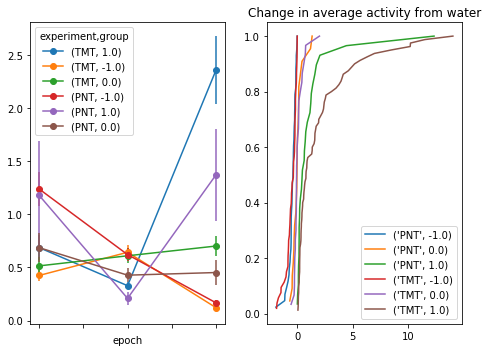

In [18]:
# Average by epochs

plt_name = 'neural_mean_by_epoch_by_group'

neural_cell_response = neural_response.mean(axis=0, level='epoch')
neural_cell_response.columns = new_col
epoch_diff = neural_cell_response.loc['odor'] - neural_cell_response.loc['h2o']

# Plot data
fig, axes = plt.subplots(ncols=2, figsize=(7, 5))
Y = neural_cell_response.mean(axis=1, level=['experiment', 'group'])
E = neural_cell_response.sem(axis=1, level=['experiment', 'group'])
Y.plot(ax=axes[0], yerr=E, marker='o')

for grp, df in epoch_diff.groupby(level=['experiment', 'group']):
    custom.cdf(df.dropna(), ax=axes[1], label=grp)
axes[1].legend()
axes[1].set_title('Change in average activity from water')

fig.tight_layout()

if plt_name:
    savefig((os.path.join(output_dir, plt_name) + '.png').format(stim), fig)
    savefig((os.path.join(output_dir, plt_name) + '.svg').format(stim), fig)

# Correlation

In [20]:
behav_response.columns.levels[2]

Index([u'Area', u'Areachange', u'Direction', u'Distance to point',
       u'Elongation', u'Head directed to zone', u'Heading to point',
       u'In zone(Non-Odor Zone / center-point)',
       u'In zone(Odor Zone / center-point)', u'Mobility state(Highly mobile)',
       u'Mobility state(Immobile)', u'Mobility state(Mobile)', u'Result 1',
       u'Trial time', u'Velocity', u'X center', u'X nose', u'X tail',
       u'Y center', u'Y nose', u'Y tail',
       u'Zone transition(center-point / Non-Odor Zone > Odor Zone)',
       u'Zone transition(center-point / Odor Zone > Non-Odor Zone)'],
      dtype='object', name=u'feature')

In [29]:
scipy.stats.pearsonr(obs_behav, obs_neural)

(0.1314717955420414, 0.022753611687115323)

In [30]:
features = ['Distance to point', 'Velocity', 'Mobility state(Immobile)']

behav_corr_data = behav_response.unstack('epoch')
temp = neural_response.copy()
temp.columns = new_col
neural_corr_data = temp.unstack('epoch')

corrs = np.zeros((len(features) * 2, neural_corr_data.shape[1]), dtype=float) * np.nan
corrs = pd.DataFrame(corrs, index=pd.MultiIndex.from_product([features, ['r', 'p']]), columns=neural_corr_data.columns)
for obs_key in neural_corr_data:
    subj, exp, neuron, grp, epoch = obs_key
    obs_neural = neural_corr_data[obs_key]
    for feature in features:
        obs_behav = behav_corr_data[subj, exp, feature, epoch]
        corrs.loc[feature, obs_key] = np.array(scipy.stats.pearsonr(obs_behav, obs_neural))

C:\Users\Randall\Anaconda3\envs\py2\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Randall\Anaconda3\envs\py2\lib\site-packages\scipy\stats\stats.py:3012: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Users\Randall\Anaconda3\envs\py2\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [35]:
import itertools

In [38]:
corrs

subject                         H123                                    \
experiment                       TMT                                     
neuron                            0                                 1    
group                            1.0                              -1.0   
epoch                           base           h2o      odor      base   
Distance to point        r  0.131472 -7.036827e-01  0.143929 -0.203677   
                         p  0.022754  3.840152e-46  0.012577  0.000385   
Velocity                 r -0.052781  1.435100e-01  0.081092 -0.041452   
                         p  0.362288  1.283983e-02  0.161217  0.474439   
Mobility state(Immobile) r  0.013922 -1.238224e-01 -0.027709  0.017784   
                         p  0.810218  3.203526e-02  0.632630  0.759024   

subject                                                                      \
experiment                                                                    
neuron                                           2                            
group                                           1.0                           
epoch                            h2o odor      base       h2o          odor   
Distance to point        r -0.128648  NaN  0.176882 -0.250692 -3.028361e-01   
                         p  0.025867  1.0  0.002104  0.000011  8.819013e-08   
Velocity                 r -0.114291  NaN  0.015949 -0.082605  3.566260e-01   
                         p  0.047951  1.0  0.783228  0.153517  1.997328e-10   
Mobility state(Immobile) r  0.039565  NaN -0.049794 -0.083325 -7.355805e-02   
                         p  0.494801  1.0  0.390121  0.149950  2.039188e-01   

subject                                   ...            J53           J54  \
experiment                                ...            PNT           PNT   
neuron                            3       ...             26            18   
group                            1.0      ...           -1.0           0.0   
epoch                           base      ...           odor          base   
Distance to point        r  0.162181      ...      -0.071642  6.885773e-01   
                         p  0.004862      ...       0.215978  1.716878e-43   
Velocity                 r -0.037967      ...      -0.064867  4.014997e-01   
                         p  0.512408      ...       0.262706  4.769784e-13   
Mobility state(Immobile) r  0.001694      ...       0.185509 -4.413919e-01   
                         p  0.976687      ...       0.001248  9.802944e-16   

subject                                                                     \
experiment                                                                   
neuron                                                        20             
group                                                        0.0             
epoch                            h2o          odor          base       h2o   
Distance to point        r -0.120971  3.172204e-01 -4.183986e-01 -0.214325   
                         p  0.036240  1.940525e-08  3.832143e-14  0.000184   
Velocity                 r  0.177233 -4.947979e-02 -3.514980e-01  0.008439   
                         p  0.002060  3.931269e-01  3.759220e-10  0.884275   
Mobility state(Immobile) r -0.113639 -1.118564e-01  2.778241e-01 -0.065662   
                         p  0.049248  5.294132e-02  1.015862e-06  0.256890   

subject                                                                
experiment                                                             
neuron                                          22                     
group                                          1.0                     
epoch                           odor          base  h2o          odor  
Distance to point        r -0.265693  6.140977e-01  NaN -3.579176e-01  
                         p  0.000003  1.739953e-32  1.0  1.700191e-10  
Velocity                 r  0.222549  3.905936e-01  NaN  3.361064e-01  
                     

In [41]:
for x in pairs: print(x)

(('PNT', 1.0), ('TMT', 1.0))
(('PNT', 1.0), ('TMT', -1.0))
(('PNT', 1.0), ('PNT', 0.0))
(('PNT', 1.0), ('TMT', 0.0))
(('PNT', -1.0), ('TMT', 1.0))
(('PNT', -1.0), ('TMT', -1.0))
(('PNT', -1.0), ('PNT', 0.0))
(('PNT', -1.0), ('TMT', 0.0))
(('TMT', 1.0), ('TMT', -1.0))
(('TMT', 1.0), ('PNT', 0.0))
(('TMT', 1.0), ('TMT', 0.0))
(('TMT', -1.0), ('PNT', 0.0))
(('TMT', -1.0), ('TMT', 0.0))
(('PNT', 0.0), ('TMT', 0.0))


In [53]:
datasets.keys()

[('PNT', -1.0, 'h2o'),
 ('TMT', 0.0, 'base'),
 ('PNT', 1.0, 'odor'),
 ('PNT', 1.0, 'base'),
 ('PNT', -1.0, 'base'),
 ('PNT', -1.0, 'odor'),
 ('TMT', 0.0, 'h2o'),
 ('PNT', 1.0, 'h2o'),
 ('TMT', 1.0, 'h2o'),
 ('PNT', 0.0, 'odor'),
 ('TMT', 0.0, 'odor'),
 ('TMT', 1.0, 'base'),
 ('TMT', 1.0, 'odor'),
 ('PNT', 0.0, 'h2o'),
 ('TMT', -1.0, 'odor'),
 ('TMT', -1.0, 'base'),
 ('PNT', 0.0, 'base'),
 ('TMT', -1.0, 'h2o')]

Saved ./data/homecage\neural-behav-corr-distro.png
Saved ./data/homecage\neural-behav-corr-distro.svg


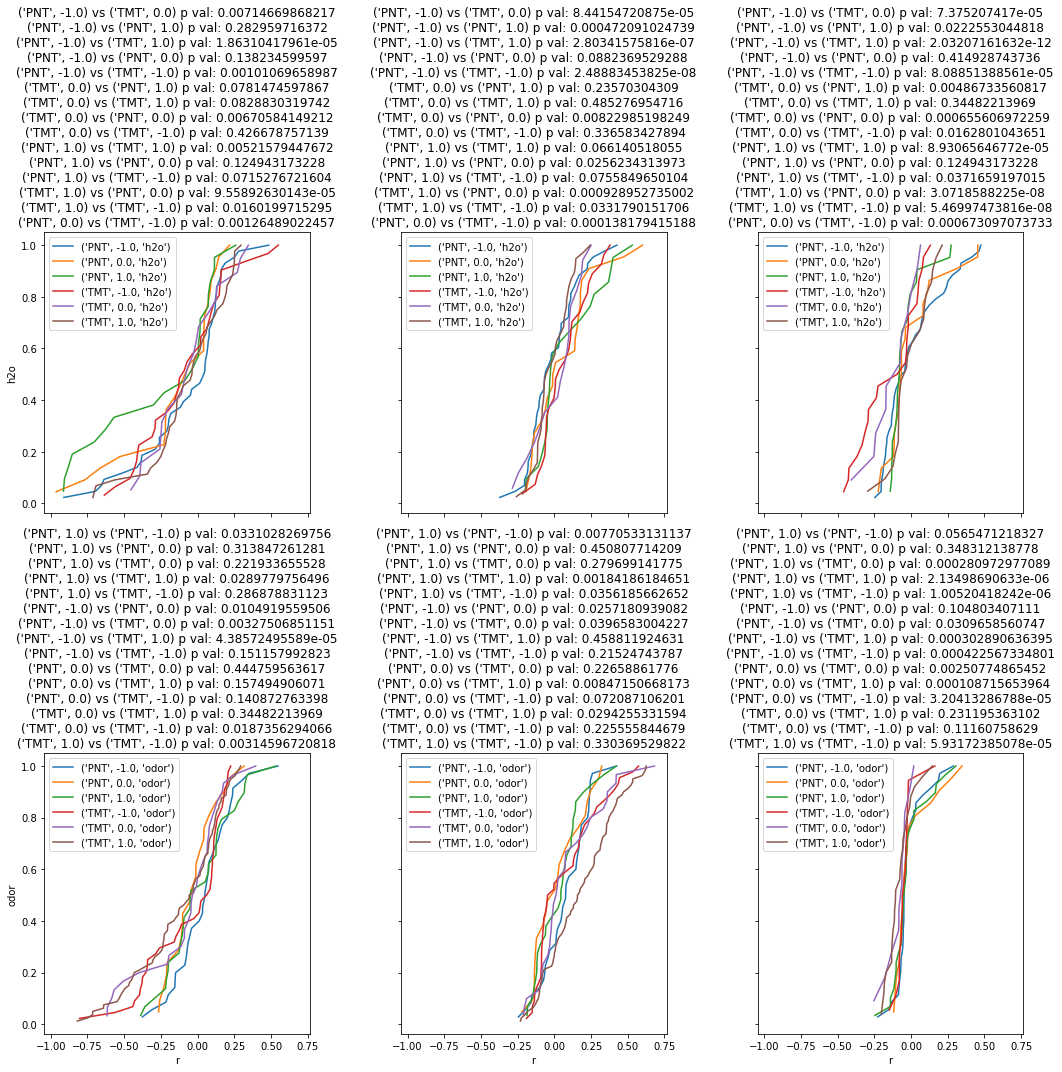

In [60]:
# Plot

datasets = {}

fig, axes = plt.subplots(nrows=2, ncols=len(features), sharex=True, sharey=True, figsize=(15, 15))
for n, feature in enumerate(features):
    for key, grp in corrs.loc[(feature, 'r')].groupby(level=['experiment', 'group', 'epoch']):
        datasets[key] = grp
        if key[2] == 'h2o':
            custom.cdf(grp, ax=axes[0, n], label=key)
        elif key[2] == 'odor':
            custom.cdf(grp, ax=axes[1, n], label=key)
    axes[0, n].set_title(feature)
    axes[1, n].set_xlabel('r')
    axes[0, 0].set_ylabel('h2o')
    axes[1, 0].set_ylabel('odor')
    
    for e, ep in enumerate(['h2o', 'odor']):
        pairs = itertools.combinations([dset[:2] for dset in datasets if dset[2] == ep], 2)
        post_hocs = []
        for (x_odor, x_grp), (y_odor, y_grp) in pairs:
            xset = corrs.loc[(feature, 'r'), (slice(None), x_odor, slice(None), x_grp, ep)]
            yset = corrs.loc[(feature, 'r'), (slice(None), y_odor, slice(None), y_grp, ep)]
            w, p = scipy.stats.mannwhitneyu(xset, yset)
            post_hocs.append('{} vs {} p val: {}'.format((x_odor, x_grp), (y_odor, y_grp), p))
        axes[e, n].set_title('\n'.join(post_hocs))

for ax in axes.flatten(): ax.legend()
fig.tight_layout()

plt_name = 'neural-behav-corr-distro'
if plt_name:
    savefig(os.path.join(output_dir, plt_name + '.png'), fig)
    savefig(os.path.join(output_dir, plt_name + '.svg'), fig)

# Compare to EPM

In [25]:
%store -r neural_arm

In [90]:
# Import matches
match_file = 'C:/Users/Randall/Desktop/epm-homecage-match.csv'
matches = pd.read_csv(match_file)
matches = matches.dropna(axis=0, how='all')
matches -= 1   # Fix indexing from 1

# Reorganize table
matches = matches.stack().reorder_levels([1, 0]).sort_index().astype(int)
# matches = matches.reset_index(1)
# matches.columns = ['homecage', 'epm']

In [91]:
homecage_matched = matches.index.tolist()
homecage_matched_response = grouping.xs('TMT', axis=1, level='experiment')[homecage_matched].loc['group']

epm_matched = [(a[0], b) for a, b in zip(homecage_matched, matches)]
epm_matched_response = neural_arm.reset_index('response')['response'][epm_matched]

In [102]:
len((homecage_matched_response.as_matrix() - epm_matched_response.as_matrix()).nonzero()[0])

14

In [103]:
len(homecage_matched_response)

22

In [96]:
epm_matched_response

subject  neuron
H170     6        -1
         1         1
         0         1
         4         0
         3        -1
H185     2         1
         5         1
         0         0
         1         1
H186     17        1
         11        1
         36       -1
         42        1
         20        0
         44       -1
         34        0
         48        0
H187     7         0
         45        1
         26        0
         12       -1
         51        1
Name: response, dtype: int64

# GLM

In [62]:
# Define functions

def ar_terms(signal, shift=1, level=None, name='ar'):
    '''Define autoregressive terms
    Shift timestamps in index to create autoregressive terms.
    '''
    ar = signal.copy()
    if level:
        old_index = zip(*signal.index.tolist())
        new_ts = [x + shift for x in old_index[level]]
        new_index = list(old_index)
        new_index[level] = new_ts
        ar.index = pd.MultiIndex.from_tuples(zip(*new_index))
    else:
        old_index = signal.index
        ar.index = [x + shift for x in old_index]

    ar.name = name
    return ar


def plot_model(output_file, W_curr, B_curr, Y_curr, y, train_ix, y_predicted):
    
    rez = Y_curr - y[train_ix]
    
    fig, ax = plt.subplots(2, 4, figsize=(14, 4));

    ax[0][0].plot(y[train_ix]);
    ax[0][0].plot(Y_curr);
    ax[0][0].set_ylabel("Fluorescence value")
    ax[0][0].set_xlabel("Observations | frames")

    ax[0][1].scatter(y[train_ix], Y_curr);
    ax[0][1].set_ylabel("Predicted");
    ax[0][1].set_xlabel("Training value");

    ax[0][2].plot(rez);
    ax[0][2].set_ylabel("Residual");
    ax[0][2].set_xlabel("Observations (Time)");
    
    ax[0][3].scatter(rez, y[train_ix]);
    ax[0][3].set_ylabel("Residual");
    ax[0][3].set_xlabel("Training value");
    
    ax[1][3].plot(cost_hx);
    ax[1][3].set_ylabel("Cost");
    ax[1][3].set_xlabel("Iteration");

    ax[1][0].plot(y_predicted);
    ax[1][0].plot(y[~train_ix]);
    ax[1][0].set_ylabel("Fluorescence value");
    ax[1][0].set_xlabel("Observations | frames");

    ax[1][1].scatter(y[~train_ix], y_predicted);
    ax[1][1].set_ylabel("Predicted");
    ax[1][1].set_xlabel("Test value");
    
    fig.tight_layout()
    fig.savefig(output_file)
    plt.close()
    
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [22]:
# Normalize features

col_no_norm = [
    u'In zone(Non-Odor Zone / center-point)',
    u'In zone(Odor Zone / center-point)',
    u'Mobility state(Immobile)',
    u'Mobility state(Mobile)',
    u'Mobility state(Highly mobile)',
    u'Zone transition(center-point / Non-Odor Zone > Odor Zone)',
    u'Zone transition(center-point / Odor Zone > Non-Odor Zone)'
]

behav_norm = behav.copy()
for column in behav:
    if column[2] in col_no_norm:
        behav_norm[column] = (behav_norm[column] > 0).astype(int)
    else:
        behav_norm[column] = (behav[column] - behav[column].mean()) * (1 /  (behav[column].std() or 1))  # if std is 0, entire column is 0

for feature in behav_norm.columns.levels[2]: print(feature)

Area
Areachange
Direction
Distance to point
Elongation
Head directed to zone
Heading to point
In zone(Non-Odor Zone / center-point)
In zone(Odor Zone / center-point)
Mobility state(Highly mobile)
Mobility state(Immobile)
Mobility state(Mobile)
Result 1
Trial time
Velocity
X center
X nose
X tail
Y center
Y nose
Y tail
Zone transition(center-point / Non-Odor Zone > Odor Zone)
Zone transition(center-point / Odor Zone > Non-Odor Zone)


In [24]:
neural_glm = neural_norm.loc[(['h2o', 'odor'], response_slice), :].unstack('epoch')
neural_glm.columns = neural_glm.columns.reorder_levels(['subject', 'experiment', 'epoch', 'neuron'])
neural_glm = neural_glm.sort_index(axis=1)
# ar1 = ar_terms(neural_glm, shift=200)
# ar2 = ar_terms(neural_glm, shift=400)

behav_glm = behav_norm.unstack('epoch').loc[(response_slice), (slice(None), slice(None), features, ['h2o', 'odor'])]
behav_glm.columns = behav_glm.columns.reorder_levels(['subject', 'experiment', 'epoch', 'feature'])
behav_glm = behav_glm.sort_index(axis=1)
behav_glm = behav_glm.rename(renamer, axis=1, level='feature')  # Rename dataframe features for statsmodels

In [25]:
# Choose features

features = [
    'Velocity',
    'Mobility state(Immobile)',
    'Distance to point',
]

extra_features = []

interactions = [['Mobility state(Immobile)', 'Distance to point']]

n_features = len(features) + len(extra_features) + len(interactions)
n_coeffs = n_features + 1

# Correct variable names for statsmodels
renamer = {label: '_'.join(str(label).translate(None, '()<>/-').split()) for label in features}
behav_glm = behav_glm.rename(columns=renamer)
features_rn = [renamer[f] for f in features]
interactions_rn = [[renamer[f] for f in intx] for intx in interactions]

# Create formula
formula = 'neural ~ ' + ' + '.join(extra_features + features_rn + ['*'.join(intx) for intx in interactions_rn])
print(formula)

neural ~ Velocity + Mobility_stateImmobile + Distance_to_point + Mobility_stateImmobile*Distance_to_point


### Linear regression
Model activity of each neuron from experimental variables
Assumptions
- linear relation
- residuals are normally distributed
- little multicolinearity among features
- little autocorrelation
- homoscedasticity

In [26]:
# Train model

n_cells = neural_glm.shape[1]

file_ts = time.strftime('%Y%m%d-%H%M%S')
output_file_base = os.path.join(output_dir, 'linear-models', file_ts)
if not os.path.isdir(output_file_base):
    os.makedirs(output_file_base)

coeffs = np.nan * np.zeros((n_cells, n_coeffs))
coeff_index = []
datas = []
models = []
results = pd.DataFrame()

for cell in xrange(n_cells):
    # Identify cell
    anim, exp, epoch, anim_cell = neural_glm.columns[cell]
    coeff_index.append([anim, exp, epoch, anim_cell])
    
    # Create cell's data for regression
    neural_list = [neural_glm.iloc[:, cell].rename('neural')]
    if 'ar1' in formula: neural_list += ar1.iloc[:, cell].rename('ar1')
    if 'ar2' in formula: neural_list += ar2.iloc[:, cell].rename('ar2'),
    neural_cell_data = pd.concat(neural_list, axis=1)
    behav_cell_data = behav_glm.loc[:, (anim, exp, epoch)] if not behav_glm.empty else pd.DataFrame([])
    data = pd.concat([neural_cell_data, behav_cell_data], axis=1)
    data = data.dropna()  # Can't handle nan's
    datas.append(data)
    
    # Regress
    model = smf.ols(data=data, formula=formula).fit()
    result = pd.concat(
        [
            model.params,
            model.pvalues,
            pd.Series([model.rsquared, model.rsquared_adj], index=['r_squared', 'r_squared_adj']),
            pd.Series(model.aic, index=['aic'])
        ],
        axis=0, keys=['coefficients', 'p', 'r_squared', 'model']
    )
    result = result.rename((anim, exp, epoch, anim_cell))
    
    models.append(model)
    results = pd.concat([results, result], axis=1)

results.columns = pd.MultiIndex.from_tuples(results.columns, names=['subject', 'experiment', 'epoch', 'neuron'])
results = results.T

/home/rung/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/home/rung/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/rung/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/rung/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/rung/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/rung/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:660: RuntimeWa

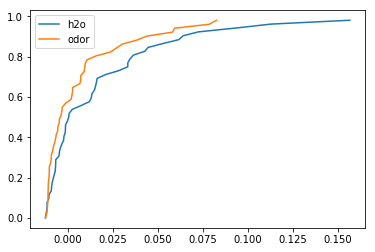

In [27]:
fig, ax = plt.subplots()
custom.cdf(results.dropna().loc[(slice(None), 'TMT', 'h2o'), ('r_squared', 'r_squared_adj')], ax=ax, label='h2o')
custom.cdf(results.dropna().loc[(slice(None), 'TMT', 'odor'), ('r_squared', 'r_squared_adj')], ax=ax, label='odor')
ax.legend()

In [28]:
r = pd.DataFrame()

for _ in np.arange(100):
    x = np.random.random(100) * 100
    y = 5 * x + np.random.random(100)
    a = np.random.random(100) * 200
    d = pd.DataFrame([y, x, a], index=['y', 'x', 'a']).T

    model = smf.ols(data=d, formula='y ~ x + a').fit()
    result = pd.concat(
        [
            model.params,
            model.pvalues,
            pd.Series([model.rsquared, model.rsquared_adj], index=['r_squared', 'r_squared_adj']),
            pd.Series(model.aic, index=['aic'])
        ],
        axis=0, keys=['coefficients', 'p', 'r_squared', 'model']
    )
    r = pd.concat([r,result ], axis=1)

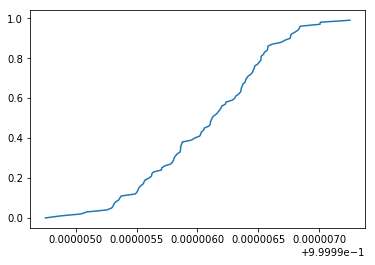

In [29]:
custom.cdf(r.T.loc[:, ('r_squared', 'r_squared')])

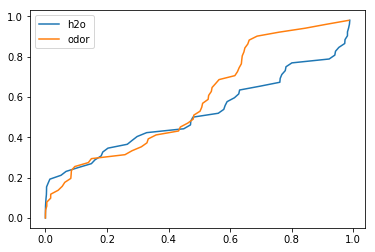

In [30]:
fig, ax = plt.subplots()
custom.cdf(results.dropna().loc[(slice(None), 'TMT', 'h2o'), ('p', 'Distance_to_point')], ax=ax, label='h2o')
custom.cdf(results.dropna().loc[(slice(None), 'TMT', 'odor'), ('p', 'Distance_to_point')], ax=ax, label='odor')
ax.legend()

In [71]:
var = 'Velocity'

y = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].sem()
print y, e

y = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].sem()
print y, e

-0.000206414612364 0.0277498323003
0.0563851615163 0.0160154328663


In [72]:
var = 'Distance_to_point'

y = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].sem()
print y, e

y = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].sem()
print y, e

-0.835544693385 0.52015734887
-0.122889501223 0.0290135911994


In [73]:
var = 'Mobility_stateImmobile'

y = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'h2o'), ('coefficients', var)].sem()
print y, e

y = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].mean()
e = results.loc[(slice(None), 'TMT', 'odor'), ('coefficients', var)].sem()
print y, e

-0.0279951540905 0.013824427898
-0.0361284347148 0.00870085920218


In [33]:
n=99

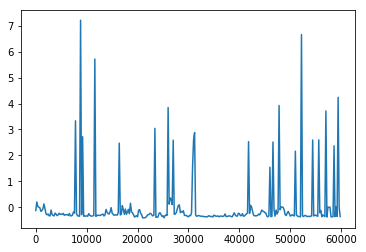

In [34]:
models[n].resid.plot()

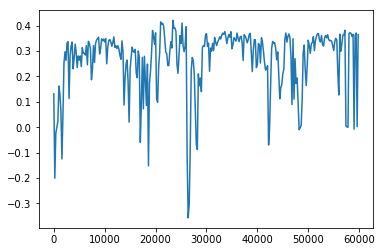

In [35]:
models[n].fittedvalues.plot()

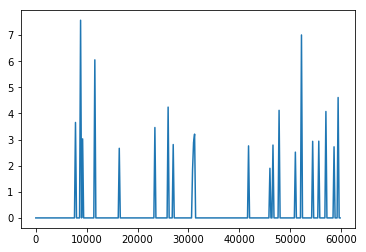

In [36]:
datas[n]['neural'].plot()

In [78]:
var = 'r_squared_adj'

y = results.loc[(slice(None), 'TMT', 'h2o'), ('r_squared', var)].mean()
e = results.loc[(slice(None), 'TMT', 'h2o'), ('r_squared', var)].sem()
print y, e

y = results.loc[(slice(None), 'TMT', 'odor'), ('r_squared', var)].mean()
e = results.loc[(slice(None), 'TMT', 'odor'), ('r_squared', var)].sem()
print y, e

0.0112177967319 0.00267749727501
0.0190504800267 0.00402963533473


In [ ]:
# Create dataframe for coefficients

coeffs_epoch = []
for epoch_n, epoch in enumerate(['h2o', 'tmt']):
    index_arr = np.array(coeff_index[epoch_n]).T
    if n_levels == 2:
        index = pd.MultiIndex.from_arrays(index_arr, names=['subject', 'cell'])
    elif n_levels == 3:
        index = pd.MultiIndex.from_arrays(index_arr, names=['subject', 'cell', 'group'])

    df = pd.DataFrame(
        coeffs[:, epoch_n, :],
        columns=pd.Index(['intercept'] + feature_names, names=['features']),
        index=index
    )
    coeffs_epoch.append(df.sort_index(axis=1))
    
coeffs_df = pd.concat(coeffs_epoch, axis=1, keys=['h2o', 'tmt'], names=['epoch', 'feature'])
coeffs_df = coeffs_df.sort_index()

# Save coefficient data
with pd.HDFStore(filename, mode='a') as hf:
    hf_key ='post-analysis/coefficients_epoch_' + method
    hf[hf_key] = coeffs_df
    hf.get_storer(hf_key).attrs['timestamp'] = file_ts

# Cluster analysis

In [ ]:
# Transform data

# PCA
pca_data = neural_norm.loc[(['h2o', 'odor'], response_slice), (slice(None), slice(None), 'TMT')].T
# pca_data = neural_norm.loc[(['h2o', 'odor'], response_slice), :].stack('experiment').T
pca = sklearn.decomposition.PCA(0.95)
transformed = pca.fit_transform(pca_data)

In [ ]:
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis('equal')

In [ ]:
compressed_data = transformed

max_n_clusters = 15
silhouette_scores = np.nan * np.ones((4, max_n_clusters))

for n, n_n in enumerate([10, 20, 50, 100]):
    for n_clusters in range(2, max_n_clusters):
        model = SpectralClustering(affinity='rbf', n_neighbors=n_n, n_clusters=n_clusters)
        model.fit(compressed_data)
        silhouette_scores[n, n_clusters] = silhouette_score(compressed_data, model.labels_, metric='cosine')

plt.pcolor(silhouette_scores, vmin=-1, vmax=1)

In [ ]:
# Create clusters

# Clustering
cluster = SpectralClustering(affinity='nearest_neighbors', n_neighbors=20, n_clusters=3)
cluster.fit(transformed)

# Plot
plt.scatter(transformed[:, 0], transformed[:, 1], c=cluster.labels_, cmap='jet', s=3)
plt.ylabel('PC1');
plt.xlabel('PC0');

In [ ]:
# Add clustering group to data
if 'group' not in neural_norm.columns.names:
    new_col = [x + (y, ) for x, y in zip(neural_norm.columns, cluster.labels_)]
else:
    new_col = [x[:-1] + (y, ) for x, y in zip(neural_norm.columns, cluster.labels_)]

new_col = pd.MultiIndex.from_tuples(new_col, names=['subject', 'neuron', 'group'])
neural_norm.columns = new_col

In [ ]:
# Heatmaps by clusters

unique_labels = np.unique(cluster.labels_)
fig, ax  = plt.subplots(len(unique_labels), 3, sharex='col', sharey='row', figsize=(7, 12))
opts = {'cmap': 'coolwarm', 'vmin': -max_z, 'vmax': max_z}

neural_norm_sorted = neural_norm.iloc[:, sort_ix]

for i, label in enumerate(unique_labels):
    for j, epoch in enumerate(['baseline', 'h2o', 'tmt']):
        C = neural_norm_sorted.loc[epoch].xs(label, axis=1, level='group')
#         C = neural_norm_sorted.loc[epoch, 'PNOC170'].xs(label, axis=1, level='group')
        im = ax[i][j].pcolormesh(C.T, **opts)
        
        ax[i][j].set_yticks([0, C.shape[1]])
#         ax[i][j].set_ylim([0, C.shape[1]])
#         ax[i][j].set_xlim([0, C.shape[0]])
        if j == 0:
            ax[i][j].set_ylabel("Cluster " + str(i));
#             ax[i][j].set_aspect(25)
    
# fig.tight_layout()

# var = 'Distance to point'
# ax[3][2].plot(np.arange(C.shape[0]), behav.mean(axis=1, level='feature').loc['tmt', 'Mobility state(Highly mobile)']);
# ax[4].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC130', var)].iloc[:C.shape[0]]);
# ax[5].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC169', var)].iloc[:C.shape[0]]);
# ax[6].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC170', var)].iloc[:C.shape[0]]);
# ax[7].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC185', var)].iloc[:C.shape[0]]);
# ax[8].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC186', var)].iloc[:C.shape[0]]);

# fig.savefig('grouped_response.svg')

In [ ]:
# Mean trace by clusters

unique_labels, label_counts = np.unique(cluster.labels_, return_counts=True)
count_dict = {u: c for u, c in zip(unique_labels, label_counts)}
counts_df = pd.Series(count_dict)
counts_df.index.name = 'group'

Ys = neural_norm.mean(axis=1, level='group')
# Es = neural_norm.sem(axis=1, level='group', numeric_only=True)
Es = neural_norm.std(axis=1, level='group') * (1 / np.sqrt(counts_df))

fig, ax  = plt.subplots(len(unique_labels), 3, sharex='col', sharey=True, figsize=(7, 10))
opts = {'cmap': 'coolwarm', 'vmin': -max_z, 'vmax': max_z}

for i, label in enumerate(unique_labels):
    for j, epoch in enumerate(['baseline', 'h2o', 'tmt']):
        Y = Ys.loc[(epoch, slice(None)), label]   # `slice(None)` added to prevent having `label` refer to timestamp 0 when label is 0
        E = Es.loc[(epoch, slice(None)), label]
        Y.index = Y.index.droplevel()
        E.index = E.index.droplevel()
        X = Y.index

        Y.plot(ax=ax[i][j])
        ax[i][j].fill_between(X, Y + E, Y - E, alpha=0.3, color='r')
        if j == 0:
            ax[i][j].set_ylabel("Cluster " + str(i));
    
# fig.tight_layout()

# var = 'Distance to point'
# ax[3].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC123', var)].iloc[:C.shape[0]]);
# ax[4].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC130', var)].iloc[:C.shape[0]]);
# ax[5].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC169', var)].iloc[:C.shape[0]]);
# ax[6].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC170', var)].iloc[:C.shape[0]]);
# ax[7].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC185', var)].iloc[:C.shape[0]]);
# ax[8].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC186', var)].iloc[:C.shape[0]]);

# fig.savefig('grouped_response.svg')

In [ ]:
a = neural_norm.mean(axis=0, level='epoch').xs(1, axis=1, level='group')
scipy.stats.ttest_rel(a.loc['h2o'], a.loc['baseline'])

# Neuron correlations

In [ ]:
for key, val in neural_response.groupby(axis=1, level='subject'):
    print key
    print val

In [ ]:
def epoch_corr(data):
    data.groupby(axis=1, level='epoch').apply(np.corrcoef)
corr = neural_response.T.groupby(axis=0, level='subject').apply(epoch_corr)

In [ ]:
corr

In [ ]:
neural_response.T.groupby(axis=0, level='subject').apply(np.shape)

In [ ]:
for key, val in neural_response.T.groupby(axis=0, level='subject'):
    pass

In [ ]:
val

In [ ]:
val.groupby(axis=1, level='epoch').apply(np.shape)

In [ ]:
plt.pcolormesh(corr[0])
plt.axis('image')
plt.colorbar()

# Old

# Classify by response to TMT
- should use PCA to reduce number of time points
- use smaller response window?

In [ ]:
# PCA
X = neural_response.loc[['h2o', 'odor']].transpose()
X = X.stack('epoch')
pca = PCA(n_components=20)
pca.fit(X)

# Create transformed datafrmae
neural_transformed = pd.DataFrame(pca.transform(X), index=X.index, columns=pd.Index(np.arange(20), name='pc'))
neural_transformed = neural_transformed.unstack('epoch').transpose()
neural_transformed = neural_transformed.reorder_levels(['epoch', 'pc'], axis=0)
neural_transformed = neural_transformed.sort_index()

# Plot variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('explained variance')
plt.xlabel('n_components')

In [ ]:
# Classify neurons

if 'response' in neural_response.columns.names:
    # Remove resonse if already calculated
    neural_response.columns = neural_response.columns.droplevel(level='response')

p_vals = {}
for cell in neural_response.columns:
    X1 = neural_response.loc['h2o', cell]
    X2 = neural_response.loc['odor', cell]
    
    # Check that we don't have data with only one value
    if len(np.unique(np.concatenate([X1, X2]))) == 1:
        p_vals[cell] = np.nan
    else:
        _, p_vals[cell] = scipy.stats.mannwhitneyu(X1, X2)

# Multiple comparisons correction
# fdr = 0.05
# p_vals_keys, p_vals_vals = zip(*p_vals.items())
# significant_ix = custom.bh_correction(p_vals_vals, fdr=fdr)
# significant_cells = [key for n, key in enumerate(p_vals_keys) if n in significant_ix]

# Bonferonni correction
p_adj = 0.05 / len(p_vals)
significant_cells = [key for key, val in p_vals.iteritems() if val < p_adj]

# Determine response type and add to DataFrames
diff = neural_response.loc['odor'].mean() - neural_response.loc['h2o'].mean()
exc_cells = neural_response.columns[np.where(diff > 0)[0]]
inh_cells = neural_response.columns[np.where(diff < 0)[0]]
response_group = [
    key + tuple([
        1 if key in significant_cells and key in exc_cells else
        -1 if key in significant_cells and key in inh_cells else
        0
    ])
    for key in neural_response.columns
]

neural_response.columns = pd.MultiIndex.from_tuples(response_group, names=neural_response.columns.names + ['response'])

# Plot results
neural_cell_means = neural_response.mean(axis=0, level=['epoch'])
epoch_means_by_type = neural_cell_means.mean(axis=1, level=['response', 'experiment'])
epoch_sems_by_type = neural_cell_means.sem(axis=1, level=['response', 'experiment'])

fig, axes = plt.subplots(ncols=2)
for ax, exp in zip(axes, [odor_tmt, odor_pnt]):
    epoch_means_by_type.loc[slice(None), (slice(None), exp)].plot.bar(yerr=epoch_sems_by_type, ax=ax);
    ax.set_title('Mean response by epoch in {} exps'.format(exp));
fig.tight_layout()

In [ ]:
asd = neural_norm.loc[(slice(None), response_slice), (slice(None), slice(None), 'TMT')].as_matrix()
plt.pcolormesh(asd.T, vmax=10)
plt.colorbar()

In [ ]:
asd = neural_norm.loc[(slice(None), response_slice), (slice(None), slice(None), 'PNT')].as_matrix()
plt.pcolormesh(asd.T, vmax=10)
plt.colorbar()

In [ ]:
e1 = neural_norm.loc[('odor', response_slice), (slice(None), slice(None), 'PNT')].as_matrix()
e2 = neural_norm.loc[('h2o', response_slice), (slice(None), slice(None), 'PNT')].as_matrix()
plt.hist(e1.flatten(), bins=50, range=(0, 20), histtype='step');
plt.hist(e2.flatten(), bins=50, range=(0, 20), histtype='step');

In [ ]:
e1 = neural_norm.loc[('odor', response_slice), (slice(None), slice(None), 'TMT')].as_matrix()
e2 = neural_norm.loc[('h2o', response_slice), (slice(None), slice(None), 'TMT')].as_matrix()
plt.hist(e1.flatten(), bins=50, range=(0, 20), histtype='step');
plt.hist(e2.flatten(), bins=50, range=(0, 20), histtype='step');

In [ ]:
# response_avg = neural_cell_mean.loc[(slice(None), response_slice), slice(None)].mean(level='epoch')
# responses_all = response_avg.loc['odor'] - response_avg.loc['h2o']
# sort_ix = {stim: np.argsort(responses_all[stim].as_matrix()) for stim in [odor_tmt, odor_pnt]}

response_avg = neural_norm.loc[(slice(None), response_slice), slice(None)].mean(level='epoch')
responses_all = response_avg.loc['odor'] - response_avg.loc['h2o']

# Classify neurons by mean activity in each epoch
p_vals = []
for cell in neural_cell_mean:
    X1 = neural_norm.loc[('h2o', response_slice), cell]
    X2 = neural_norm.loc[('odor', response_slice), cell]
    
    # Check that we don't have data with only one value
    if len(np.unique(np.concatenate([X1, X2]))) == 1:
        p_vals.append(np.nan)
    else:
        p_vals.append(scipy.stats.mannwhitneyu(X1, X2)[1])
p_vals = pd.Series(p_vals, index=responses_all.index)
responses = pd.concat([responses_all, p_vals], keys=['response', 'p_value'], axis=1)

# Multiple comparisons correction
# fdr = 0.05
# significant_ix = custom.bh_correction(responses['p_value'], fdr=fdr, as_mask=True)

# Bonferonni correction
p_adj = 0.05 / len(p_vals)
significant_ix = responses['p_value'] < p_adj

responses['significant'] = significant_ix

# auROC


# Categorize
responses['sign'] = np.where(responses['significant'], np.sign(responses['response']), 0)

In [ ]:
plt_name = 'response_type_to_odor'

response_counts = {odor: responses.loc[(slice(None), slice(None), odor), 'sign'].value_counts() for odor in [odor_tmt, odor_pnt]}
obs = [[x.loc[1], x.loc[-1], x.loc[0]] for x in response_counts.values()]
chi2, p, dof, expected = scipy.stats.chi2_contingency(obs)

fig, axes = plt.subplots(ncols=2)
fig.suptitle('No difference in proportions\np-value: {}'.format(p))
for ax, (odor, counts) in zip(axes, response_counts.iteritems()):
    ax.set_title('Responses to {}'.format(odor))
    counts.plot.pie(ax=ax, colors=['r', 'g', 'gray'], autopct='%1.1f%%', wedgeprops={'lw': 5, 'ec': 'w'})
    ax.axis('image')
    
    # Make doughnut
    centre_circle = plt.Circle((0, 0), 1 / 1.4142, color='none', fc='white')
    ax.add_artist(centre_circle);

if plt_name:
    savefig(os.path.join(output_dir, plt_name) + '.png', fig)
    savefig(os.path.join(output_dir, plt_name) + '.svg', fig)

In [ ]:

print('p-value: {}'.format(p))

In [ ]:
# Plot heatmap and averages by epoch

plt_name = ''.format(stim)
plt_name0 = 'homecage-{}-response-grouped-base.png'.format(stim)
plt_name1 = 'homecage-{}-response-grouped-h2o.png'.format(stim)
plt_name2 = 'homecage-{}-response-grouped-tmt.png'.format(stim)

response_dict = {-1: 'Inhibitory', 0: 'No effect', 1: 'Excitatory'}

for stim in [odor_tmt, odor_pnt]:
    
    fig, ax  = plt.subplots(nrows=2, ncols=3, sharey='row', sharex=True, gridspec_kw={'height_ratios':[3, 1]}, figsize=(12, 10))
    opts = {'cmap': 'copper', 'vmin': 0, 'vmax': 5}
    
    epoch_resp = responses.xs(stim, axis=0, level='experiment')

    for n, epoch in enumerate(neural_norm.index.levels[0]):
        C = neural_norm.loc[epoch].iloc[:, sort_ix[stim]]
        X = C.index.tolist()
        dx = int(round(np.diff(X).mean()))
        X.append(X[-1] + dx)
        x, y = np.meshgrid(X, np.arange(C.shape[1] + 1))
        ax[0, n].pcolormesh(x, y, C.T, **opts)

        # Group average
        opts0 = {'window': 10, 'center': True, 'win_type': 'gaussian'}
        opts1 = {'std': 2}

        C0 = neural_norm.loc[epoch][epoch_resp['sign'] == -1]
        C1 = C[(responses['sign'] == 0).index.tolist()]
        C2 = C[responses['sign'] == 1]
        Y0 = C0.mean(axis=1).rolling(**opts0).mean(**opts1)
        Y1 = C1.mean(axis=1).rolling(**opts0).mean(**opts1)
        Y2 = C2.mean(axis=1).rolling(**opts0).mean(**opts1)
        E0 = C0.sem(axis=1).rolling(**opts0).mean(**opts1)
        E1 = C1.sem(axis=1).rolling(**opts0).mean(**opts1)
        E2 = C2.sem(axis=1).rolling(**opts0).mean(**opts1)

        Y0.plot(ax=ax[1][n], color='blue', label='Inhibited')
        Y1.plot(ax=ax[1][n], color='gray', label='Other')
        Y2.plot(ax=ax[1][n], color='red', label='Excited')

        ax[1, n].fill_between(
            Y0.index, Y0 - E0, Y0 + E0,
            facecolor='blue',
            interpolate=True,
            linewidth=0,
            alpha=0.25
        )
        ax[1, n].fill_between(
            Y1.index, Y1 - E1, Y1 + E1,
            facecolor='gray',
            interpolate=True,
            linewidth=0,
            alpha=0.25
        )
        ax[1, n].fill_between(
            Y2.index, Y2 - E2, Y2 + E2,
            facecolor='red',
            interpolate=True,
            linewidth=0,
            alpha=0.25
        )

    fig.tight_layout()
    plt.show()

# Pie chart for responses
response_counts = {odor: responses.loc[(slice(None), odor), 'sign'].value_counts() for odor in [odor_tmt, odor_pnt]}

fig, axes = plt.subplots(2, 2, figsize=(5, 5))
for ax, (odor, counts) in zip(axes[0], response_counts.iteritems()):
    ax.set_title('Responses to {}'.format(odor))
    counts.plot.pie(ax=ax, colors=['r', 'b', 'gray'], autopct='%1.1f%%', wedgeprops={'lw': 5, 'ec': 'w'})
    ax.axis('image')
    centre_circle = plt.Circle((0, 0), 1 / 1.4142, color='none', fc='white')
    ax.add_artist(centre_circle);

# Venn diagram for grouping
matched_grouping = responses['sign'].unstack('experiment').dropna(axis=0)
for n, resp in enumerate([1, -1]):
    venn2(
        [set(matched_grouping[matched_grouping['PNT'] == resp].index),
         set(matched_grouping[matched_grouping['TMT'] == resp].index)],
        set_labels = ('Peanut oil', 'TMT'), set_colors=[color[odor_pnt], color[odor_tmt]],
        ax=axes[1, n]
    )

axes[1, 0].set_title('Excited')
axes[1, 1].set_title('Inhibited')

if plt_name:
    savefig(plt_name, fig)

    # ax[0][0].axis('off')
    # ax[0][1].axis('off')
    # ax[0][2].axis('off')

    # extent = ax[0][0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # savefig(plt_name0, fig, bbox_inches=extent)

    # extent = ax[0][1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # savefig(plt_name1, fig, bbox_inches=extent)

    # extent = ax[0][2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # savefig(plt_name2, fig, bbox_inches=extent)

## Test

In [ ]:
a = (neural_norm_non.fillna(0) + neural_norm_odor.fillna(0)).mean(level=['epoch', 'time_epoch'])
a = a.T.stack(['epoch', 'time_epoch'])
# sns.pointplot(data=a, x')

In [ ]:
a

In [ ]:
neural_norm.mean().mean(level='experiment')

## Statistics

In [ ]:
Y_all.head()

In [ ]:
%%R -i anova_data

aov <- aov(neural ~ experiment * time_epoch + Error(rm / time_epoch), data=anova_data)
summary(aov)
TukeyHSD(aov, 'experiment', data=anova_data)

In [ ]:
# Plot mean neural activity by zone

fig, ax = plt.subplots()

Y_all = neural_zone.loc['odor'] - neural_zone.loc['h2o']
Y = Y_all.mean(level=['experiment', 'response', 'zone'])
E = Y_all.sem(level=['experiment', 'response', 'zone'])

Y.plot.bar(ax=ax, yerr=E);
    
fig.tight_layout()
# savefig(plt_name, fig)

In [ ]:
Yi = Y_all.xs(-1, level=-1).unstack(level=0).dropna(axis=0)
Yn = Y_all.xs(0, level=-1).unstack(level=0).dropna(axis=0)
Ye = Y_all.xs(1, level=-1).unstack(level=0).dropna(axis=0)

from scipy.stats import ttest_rel

_, pi = ttest_rel(Yi['non'], Yi['odor'])
_, pn = ttest_rel(Yn['non'], Yn['odor'])
_, pe = ttest_rel(Ye['non'], Ye['odor'])

print(pi, pn, pe)

---
# STOP HERE

---
<a id='cluster'></a>
## Cluster analysis

In [ ]:
# Transform data

# PCA
pca_data = neural_norm.loc['tmt'].T
pca = sklearn.decomposition.PCA(n_components=50)
transformed = pca.fit_transform(pca_data)

In [ ]:
compressed_data = transformed

max_n_clusters = 15
silhouette_scores = np.nan * np.ones((4, max_n_clusters))

for n, n_n in enumerate([10, 20, 50, 100]):
    for n_clusters in range(2, max_n_clusters):
        model = SpectralClustering(affinity='rbf', n_neighbors=n_n, n_clusters=n_clusters)
        model.fit(compressed_data)
        silhouette_scores[n, n_clusters] = silhouette_score(compressed_data, model.labels_, metric='cosine')

plt.pcolor(silhouette_scores, vmin=-1, vmax=1)

In [ ]:
# Create clusters

# Clustering
cluster = SpectralClustering(affinity='nearest_neighbors', n_neighbors=20, n_clusters=3)
cluster.fit(transformed)

# Plot
plt.scatter(transformed[:, 0], transformed[:, 1], c=cluster.labels_, cmap='jet', s=3)
plt.ylabel('PC1');
plt.xlabel('PC0');

In [ ]:
# Add clustering group to data
if 'group' not in neural_norm.columns.names:
    new_col = [x + (y, ) for x, y in zip(neural_norm.columns, cluster.labels_)]
else:
    new_col = [x[:-1] + (y, ) for x, y in zip(neural_norm.columns, cluster.labels_)]

new_col = pd.MultiIndex.from_tuples(new_col, names=['subject', 'neuron', 'group'])
neural_norm.columns = new_col

In [ ]:
# Heatmaps by clusters

unique_labels = np.unique(cluster.labels_)
fig, ax  = plt.subplots(len(unique_labels), 3, sharex='col', sharey='row', figsize=(7, 12))
opts = {'cmap': 'coolwarm', 'vmin': -max_z, 'vmax': max_z}

neural_norm_sorted = neural_norm.iloc[:, sort_ix]

for i, label in enumerate(unique_labels):
    for j, epoch in enumerate(['baseline', 'h2o', 'tmt']):
        C = neural_norm_sorted.loc[epoch].xs(label, axis=1, level='group')
#         C = neural_norm_sorted.loc[epoch, 'PNOC170'].xs(label, axis=1, level='group')
        im = ax[i][j].pcolormesh(C.T, **opts)
        
        ax[i][j].set_yticks([0, C.shape[1]])
#         ax[i][j].set_ylim([0, C.shape[1]])
#         ax[i][j].set_xlim([0, C.shape[0]])
        if j == 0:
            ax[i][j].set_ylabel("Cluster " + str(i));
#             ax[i][j].set_aspect(25)
    
# fig.tight_layout()

# var = 'Distance to point'
# ax[3][2].plot(np.arange(C.shape[0]), behav.mean(axis=1, level='feature').loc['tmt', 'Mobility state(Highly mobile)']);
# ax[4].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC130', var)].iloc[:C.shape[0]]);
# ax[5].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC169', var)].iloc[:C.shape[0]]);
# ax[6].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC170', var)].iloc[:C.shape[0]]);
# ax[7].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC185', var)].iloc[:C.shape[0]]);
# ax[8].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC186', var)].iloc[:C.shape[0]]);

# fig.savefig('grouped_response.svg')

In [ ]:
# Mean trace by clusters

unique_labels, label_counts = np.unique(cluster.labels_, return_counts=True)
count_dict = {u: c for u, c in zip(unique_labels, label_counts)}
counts_df = pd.Series(count_dict)
counts_df.index.name = 'group'

Ys = neural_norm.mean(axis=1, level='group')
# Es = neural_norm.sem(axis=1, level='group', numeric_only=True)
Es = neural_norm.std(axis=1, level='group') * (1 / np.sqrt(counts_df))

fig, ax  = plt.subplots(len(unique_labels), 3, sharex='col', sharey=True, figsize=(7, 10))
opts = {'cmap': 'coolwarm', 'vmin': -max_z, 'vmax': max_z}

for i, label in enumerate(unique_labels):
    for j, epoch in enumerate(['baseline', 'h2o', 'tmt']):
        Y = Ys.loc[(epoch, slice(None)), label]   # `slice(None)` added to prevent having `label` refer to timestamp 0 when label is 0
        E = Es.loc[(epoch, slice(None)), label]
        Y.index = Y.index.droplevel()
        E.index = E.index.droplevel()
        X = Y.index

        Y.plot(ax=ax[i][j])
        ax[i][j].fill_between(X, Y + E, Y - E, alpha=0.3, color='r')
        if j == 0:
            ax[i][j].set_ylabel("Cluster " + str(i));
    
# fig.tight_layout()

# var = 'Distance to point'
# ax[3].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC123', var)].iloc[:C.shape[0]]);
# ax[4].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC130', var)].iloc[:C.shape[0]]);
# ax[5].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC169', var)].iloc[:C.shape[0]]);
# ax[6].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC170', var)].iloc[:C.shape[0]]);
# ax[7].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC185', var)].iloc[:C.shape[0]]);
# ax[8].plot(np.arange(C.shape[0]), behav.loc[slice(None), ('PNOC186', var)].iloc[:C.shape[0]]);

# fig.savefig('grouped_response.svg')

In [ ]:
a = neural_norm.mean(axis=0, level='epoch').xs(1, axis=1, level='group')
scipy.stats.ttest_rel(a.loc['h2o'], a.loc['baseline'])

---
<a id='model'></a>
## Model neural dynamics

### Feature selection

In [ ]:
# List features
for feature in behav_norm.columns.levels[1]: print(feature)

In [ ]:
# Choose features

features = [
#     'Trial time',
    'Velocity',
    'Mobility state(Highly mobile)',
    'Mobility state(Immobile)',
    'Distance to point',
#     'epoch',
]
# features = behav_norm.columns.levels[1]

# interactions = [' * '.join([f, 'epoch']) for f in features[:-1]]

n_features = len(features)

### Linear regression
Model activity of each neuron from experimental variables
Assumptions
- linear relation
- residuals are normally distributed
- little multicolinearity among features
- little autocorrelation
- homoscedasticity

In [ ]:
# Parameters
n_coeffs = n_features + 1

In [ ]:
# Define functions

def ar_terms(signal, shift=1):
    ar1 = signal.copy()
    new_index = ar1.index + shift
    ar1.index = new_index
    ar1.name = 'ar1'

    ar2 = signal.copy()
    new_index = ar2.index + shift * 2
    ar2.index = new_index
    ar2.name = 'ar2'

    return ar1, ar2


def plot_model(output_file, W_curr, B_curr, Y_curr, y, train_ix, y_predicted):
    
    rez = Y_curr - y[train_ix]
    
    fig, ax = plt.subplots(2, 4, figsize=(14, 4));

    ax[0][0].plot(y[train_ix]);
    ax[0][0].plot(Y_curr);
    ax[0][0].set_ylabel("Fluorescence value")
    ax[0][0].set_xlabel("Observations | frames")

    ax[0][1].scatter(y[train_ix], Y_curr);
    ax[0][1].set_ylabel("Predicted");
    ax[0][1].set_xlabel("Training value");

    ax[0][2].plot(rez);
    ax[0][2].set_ylabel("Residual");
    ax[0][2].set_xlabel("Observations (Time)");
    
    ax[0][3].scatter(rez, y[train_ix]);
    ax[0][3].set_ylabel("Residual");
    ax[0][3].set_xlabel("Training value");
    
    ax[1][3].plot(cost_hx);
    ax[1][3].set_ylabel("Cost");
    ax[1][3].set_xlabel("Iteration");

    ax[1][0].plot(y_predicted);
    ax[1][0].plot(y[~train_ix]);
    ax[1][0].set_ylabel("Fluorescence value");
    ax[1][0].set_xlabel("Observations | frames");

    ax[1][1].scatter(y[~train_ix], y_predicted);
    ax[1][1].set_ylabel("Predicted");
    ax[1][1].set_xlabel("Test value");
    
    fig.tight_layout()
    fig.savefig(output_file)
    plt.close()
    
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [ ]:
method = 'sm'   # 'sm' | 'tf' | 'sk'

In [ ]:
# Define model

# Restructure and filter DataFrame

behav_vars = behav_norm.loc[slice('h2o', 'tmt'), (slice(None), features)]
behav_vars = behav_vars.reset_index(level=1, drop=True).reset_index(col_level=1)
behav_vars[('', 'epoch')] = pd.get_dummies(behav_vars[('', 'epoch')])['tmt']

# Define model

if method == 'sm':
    # Statsmodels

    # Correct variable names
    renamer = {label: '_'.join(str(label).translate(None, '()<>/-').split()) for label in behav_vars.columns.levels[1]}
    behav_vars = behav_vars.rename(columns=renamer)
    features_sm = [renamer[f] for f in features]
    interactions_sm = [' * '.join(['epoch', f]) for f in features_sm[:-1]]
    interactions_sm =  []

    feature_names = features_sm + interactions_sm
    n_coeffs = len(feature_names) + 1

    # Create formula
    if data_type == 'trace':
        formula_base = 'neural_signal ~ ar1 + ar2 + '
    else:
        formula_base = 'neural_signal ~ '
    formula = formula_base + ' + '.join(feature_names)
    
    print(formula)

elif method == 'sk':
    model = sklearn.linear_model.LinearRegression()

elif method == 'tf':
    # Tensorflow

    # Create variables
    X = tf.placeholder(tf.float32, shape=[None, n_features])
    Y = tf.placeholder(tf.float32, shape=[None, 1])

    W = tf.Variable(tf.ones([n_features, 1], dtype=tf.float32), name='weights')
    B = tf.Variable(tf.ones([1], dtype=tf.float32), name='bias')

    # Create model and cost function
    model = tf.add(tf.matmul(X, W), B)
    cost = tf.reduce_mean(tf.square(model - Y))
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [ ]:
# Train model (epoch interaction)

n_cells = neural_norm.shape[1]

file_ts = time.strftime('%Y%m%d-%H%M%S')
output_file_base = os.path.join('linear-models', file_ts)
if not os.path.isdir(output_file_base):
    os.makedirs(output_file_base)

coeffs = np.nan * np.zeros((n_cells, n_coeffs))
coeff_index = []
datas = []

if method == 'sm':
    p_vals = np.nan * np.zeros((n_cells, n_coeffs))
    r_sq = np.nan * np.zeros((n_cells, 2))
    aic = np.nan * np.zeros((n_cells, ))
    models = []

for cell in xrange(n_cells):
    
    n_levels = len(neural_norm.columns.levels)
    if n_levels == 2:
        anim, anim_cell = neural_norm.columns[cell]
        coeff_index.append([anim, anim_cell])
    elif n_levels == 3:
        anim, anim_cell, group = neural_norm.columns[cell]
        coeff_index.append([anim, anim_cell, group])

    # Define independent variable
    neural_signal = neural_norm.loc[slice('h2o', 'tmt')].iloc[:, cell]
    neural_signal = neural_signal.reset_index(drop=True)
    neural_signal.name = 'neural_signal'
    
    # Create autoregressive terms
    if data_type == 'trace':
        ar1, ar2 = ar_terms(neural_signal)
    
    # Create feature variables
    data = behav_vars[['', anim]]
    data.columns = data.columns.droplevel(level=0)
    if data_type == 'trace':
        data = pd.concat([neural_signal, ar1, ar2, data], axis=1)
    else:
        data = pd.concat([neural_signal, data], axis=1)
    data = data.dropna()
    datas.append(data)
    
    # Regress
    if method == 'sm':
        model = smf.ols(data=data, formula=formula).fit()

        coeffs[cell, :] = model.params
        p_vals[cell, :] = model.pvalues
        r_sq[cell, :] = [model.rsquared, model.rsquared_adj]
        aic[cell] = model.aic
        models.append(model)
    elif method == 'sk':
        X = data.iloc[:, 1:]
        Y = data.iloc[:, 0]
        model.fit(X, Y)

        coeffs[cell, :] = np.append(model.intercept_, model.coef_)

In [ ]:
# Train model (epoch separate)

n_cells = neural_norm.shape[1]

file_ts = time.strftime('%Y%m%d-%H%M%S')
output_file_base = os.path.join('linear-models', file_ts)
if not os.path.isdir(output_file_base):
    os.makedirs(output_file_base)

coeffs = np.nan * np.zeros((n_cells, 2, n_coeffs))
coeff_index = [[], []]
datas = [[], []]

if method == 'sm':
    p_vals = np.nan * np.zeros((n_cells, 2, n_coeffs))
    r_sq = np.nan * np.zeros((n_cells, 2, 2))
    aic = np.nan * np.zeros((n_cells, 2, ))
    models = [[], []]

for epoch_n, epoch in enumerate(['h2o', 'tmt']):
    for cell in xrange(n_cells):
        n_levels = len(neural_norm.columns.levels)
        if n_levels == 2:
            anim, anim_cell = neural_norm.columns[cell]
            coeff_index[epoch_n].append([anim, anim_cell])
        elif n_levels == 3:
            anim, anim_cell, group = neural_norm.columns[cell]
            coeff_index[epoch_n].append([anim, anim_cell, group])

        # Define independent variable
        neural_signal = neural_norm.loc[epoch].iloc[:, cell]
        neural_signal = neural_signal.reset_index(drop=True)
        neural_signal.name = 'neural_signal'

        # Create autoregressive terms
        if data_type == 'trace':
            ar1, ar2 = ar_terms(neural_signal)

        # Create feature variables
        data = behav_vars[['', anim]]
        data.columns = data.columns.droplevel(level=0)
        if data_type == 'trace':
            data = pd.concat([neural_signal, ar1, ar2, data], axis=1)
        else:
            data = pd.concat([neural_signal, data], axis=1)
        data = data.dropna()
        datas[epoch_n].append(data)

        # Regress
        if method == 'sm':
            model = smf.ols(data=data, formula=formula).fit()

            coeffs[cell, epoch_n, :] = model.params
            p_vals[cell, epoch_n, :] = model.pvalues
            r_sq[cell, epoch_n, :] = [model.rsquared, model.rsquared_adj]
            aic[cell, epoch_n] = model.aic
            models[epoch_n].append(model)
        elif method == 'sk':
            X = data.iloc[:, 1:]
            Y = data.iloc[:, 0]
            model.fit(X, Y)

            coeffs[cell, :] = np.append(model.intercept_, model.coef_)

In [ ]:
# Create dataframe for coefficients

coeffs_epoch = []
for epoch_n, epoch in enumerate(['h2o', 'tmt']):
    index_arr = np.array(coeff_index[epoch_n]).T
    if n_levels == 2:
        index = pd.MultiIndex.from_arrays(index_arr, names=['subject', 'cell'])
    elif n_levels == 3:
        index = pd.MultiIndex.from_arrays(index_arr, names=['subject', 'cell', 'group'])

    df = pd.DataFrame(
        coeffs[:, epoch_n, :],
        columns=pd.Index(['intercept'] + feature_names, names=['features']),
        index=index
    )
    coeffs_epoch.append(df.sort_index(axis=1))
    
coeffs_df = pd.concat(coeffs_epoch, axis=1, keys=['h2o', 'tmt'], names=['epoch', 'feature'])
coeffs_df = coeffs_df.sort_index()

# Save coefficient data
with pd.HDFStore(filename, mode='a') as hf:
    hf_key ='post-analysis/coefficients_epoch_' + method
    hf[hf_key] = coeffs_df
    hf.get_storer(hf_key).attrs['timestamp'] = file_ts

In [ ]:
n = 60
y = datas[0][n]['neural_signal']
y_ = models[0][n].fittedvalues

In [ ]:
plt.plot(y)
plt.plot(y_)

In [ ]:
plt.plot(y)
plt.plot(y - y_)

In [ ]:
plt.scatter(y, y_)

### Review model

In [ ]:
# TODO: see why there are some p values == nan

In [ ]:
plt.hist(p_vals[:, 0, 4], bins=100);

In [ ]:
p_vals.shape

In [ ]:
model.pvalues

In [ ]:
features

In [ ]:
feature_ix

In [ ]:
# Neurons with significant influence from TMT
sig_ix = custom.bh_correction(p_vals.flatten(), fdr=0.05)
# sig_neuron, sig_feature = np.unravel_index(sig_ix, p_vals.shape)
sig_neuron, sig_epoch, sig_feature = np.unravel_index(sig_ix, p_vals.shape)
# sig_neurons = iloc[sig_ix].index
# print(len(sig_ix))

# Count
all_features = ['intercept'] + features
n_cells, _, n_features = p_vals.shape
for feature in range(n_features):
    feature_ix = sig_feature == feature
    n_h2o = (sig_epoch[feature_ix] == 0).sum()
    n_tmt = (sig_epoch[feature_ix] == 1).sum()
    print("Feature {}: {} water, {} tmt responsive".format(all_features[feature], n_h2o, n_tmt))

In [ ]:
# Scatter plot of Water vs TMT coefficients for each 

n_features = len(coeffs_df.columns.levels[1])
n_groups = len(coeffs_df.index.levels[2])
fig, ax = plt.subplots(nrows=n_features, ncols=n_groups, figsize=(15, 15), sharey='row')

for group_n, group in enumerate(coeffs_df.index.levels[2]):
    for feature_n, feature in enumerate(coeffs_df.columns.levels[1]):
        ax_ = ax[feature_n, group_n]
        coeff_feature = coeffs_df.loc[(slice(None), slice(None), group), (slice(None), feature)]
        coeff_feature.plot.scatter(ax=ax_, x='h2o', y='tmt')
        
        ax_.set_title("{}, group {}".format(feature, group))
        ax_.axis('equal')
        add_identity(ax_, ls='--', color='gray')

fig.tight_layout()

In [ ]:
# Neurons with significant influence from TMT
var = 'epoch * Velocity'
sig_ix = custom.bh_correction(coeffs_df[var].as_matrix(), fdr=0.05)
sig_neurons = coeffs_df[var].iloc[sig_ix].index
print(len(sig_ix))

In [ ]:
# Neurons with significant influence from TMT
var = 'epoch * Velocity'
sig_ix = custom.bh_correction(coeffs_df[var].as_matrix(), fdr=0.05)
sig_neurons = coeffs_df[var].iloc[sig_ix].index
print(len(sig_ix))

In [ ]:
# Neurons with significant influence from TMT
var = 'epoch * Velocity'
sig_ix = custom.bh_correction(coeffs_df[var].as_matrix(), fdr=0.05)
sig_neurons = coeffs_df[var].iloc[sig_ix].index
print(len(sig_ix))

In [ ]:
# Neurons with significant influence from TMT
var = 'epoch * Velocity'
sig_ix = custom.bh_correction(coeffs_df[var].as_matrix(), fdr=0.05)
sig_neurons = coeffs_df[var].iloc[sig_ix].index
print(len(sig_ix))

In [ ]:
# Plot distribution of each set of coefficients (interaction)

fig, ax = plt.subplots(nrows=len(coeffs_df.columns), ncols=1, sharex=True, sharey=True, figsize=(7, 20))

for n, feature in enumerate(coeffs_df.columns):
    coeffs_df[feature].plot.hist(ax=ax[n], bins=100, range=(-50, 50), normed=True, cumulative=False, histtype='bar')
    coeffs_df[feature].plot.hist(ax=ax[n], bins=100, range=(-50, 50), normed=True, cumulative=True, histtype='step')
    ax[n].set_title(feature)

fig.tight_layout()

In [ ]:
# Plot distribution of each set of coefficients (separate epochs)

fig, ax = plt.subplots(nrows=len(coeffs_df['h2o'].columns), ncols=1, sharex=True, sharey=True, figsize=(7, 20))

for n, feature in enumerate(coeffs_df.columns.levels[1]):
#     coeffs_df[('h2o', feature)].plot.hist(ax=ax[n], bins=100, range=(-50, 50), normed=True, cumulative=False, histtype='bar', label='water')
#     coeffs_df[('tmt', feature)].plot.hist(ax=ax[n], bins=100, range=(-50, 50), normed=True, cumulative=False, histtype='bar', label='tmt')
    
    coeffs_df[('h2o', feature)].plot.hist(ax=ax[n], bins=500, range=(-50, 50), normed=True, cumulative=True, histtype='step', label='water')
    coeffs_df[('tmt', feature)].plot.hist(ax=ax[n], bins=500, range=(-50, 50), normed=True, cumulative=True, histtype='step', label='tmt')
    
    ax[n].set_title(feature)

fig.tight_layout()

In [ ]:
# Scatter plot of neural signal vs each feature

fig, ax = plt.subplots(nrows=len(features_sm), figsize=(10, 20))
color = {'h2o': 'b', 'tmt': 'r'}

Y = neural_norm.loc[slice('h2o', 'tmt')]
X = behav_norm

for cell in Y.columns:
    for epoch in ['h2o', 'tmt']:
        for n, feature in enumerate(features[:-1]):
            ax[n].scatter(x=X.loc[epoch, (cell[0], feature)], y=Y.loc[epoch, cell], color=color[epoch], s=1)
            ax[n].set_ylabel("Neural signal")
            ax[n].set_xlabel(feature)

        ax[-1].scatter(x=np.zeros(Y.loc['h2o'].shape[0]), y=Y.loc['h2o', cell], color=color['h2o'])
        ax[-1].scatter(x=np.ones(Y.loc['tmt'].shape[0]), y=Y.loc['tmt', cell], color=color['tmt'])

fig.tight_layout()

In [ ]:
models[0].summary()

### Reduce dimensionality in coefficients

In [ ]:
# PCA
pca_data = coeffs_df
pca = sklearn.decomposition.PCA()
transformed = pca.fit_transform(pca_data)

plt.scatter(transformed[:, 0], transformed[:, 1], s=3, c=coeffs_df.index.labels[2]);
plt.axis('equal');

In [ ]:
for pc in range(5):
    plt.plot(pca.components_[pc, :], label=pc)
    
plt.legend()

### Cluster by coefficients

In [ ]:
max_n_clusters = 10
n_components = n_coeffs
silhouette_scores = np.nan * np.ones((n_components, 4, max_n_clusters))

fig, ax = plt.subplots(ncols=n_components, sharex=True, sharey=True, figsize=(12, 5))

for n_c in range(1, n_components):
    for n, n_n in enumerate([10, 20, 50, 100]):
        for n_clusters in range(2, max_n_clusters):
            X = transformed[:, :n_c]
            model = SpectralClustering(affinity='nearest_neighbors', n_neighbors=n_n, n_clusters=n_clusters)
            model.fit(X)
            silhouette_scores[n_c, n, n_clusters] = silhouette_score(X, model.labels_, metric='cosine')

    ax[n_c].pcolor(silhouette_scores[n_c].T, vmin=-1, vmax=1)
    ax[n_c].set_title(str(n_c) + " components")

ax[-1].set_xlabel("Number of clusters")
fig.tight_layout()

print(np.where(silhouette_scores == np.nanmax(silhouette_scores)))

In [ ]:
# Create clusters

reduced = transformed[:, :2]

# Clustering
cluster = SpectralClustering(affinity='nearest_neighbors', n_neighbors=100, n_clusters=5)
cluster.fit(reduced)

# Plot
plt.scatter(transformed[:, 0], transformed[:, 1], c=cluster.labels_, cmap='jet', s=3)
plt.ylabel('PC1');
plt.xlabel('PC0');
plt.axis('equal');
plt.colorbar()

In [ ]:
# Visualize interactions with epoch

feature = 'Mobility_stateImmobile'
fig, ax = plt.subplots()
opts = {'s': 3, 'ax': ax}
data_h2o = data.loc[data['epoch'] == 0]
data_tmt = data.loc[data['epoch'] == 1]
data_h2o.plot.scatter(x=feature, y='neural_signal', color='r', **opts)
data_tmt.plot.scatter(x=feature, y='neural_signal', color='b', **opts)

In [ ]:
coeffs_df_drop = coeffs_df.dropna()

# Compare clusters
fig, ax = plt.subplots(n_coeffs, 1, figsize=(10, 30))
for n, predictor in enumerate(predictor_names):
    cdf_args = {'cumulative': True, 'normed': 1, 'bins': 100, 'histtype': 'step', 'ax': ax[n]}
#     coeffs_df_drop[('h2o', predictor)].hist(label='H2O', **cdf_args)
    for l in unique_labels:
        coeffs_df_drop.loc[(slice(None), slice(None), l), ('tmt', predictor)].hist(label=str(l), **cdf_args)
    ax[n].legend(loc='upper left');
    ax[n].set_xlabel(predictor)

plt.tight_layout()

In [ ]:
# By epoch

coeffs_df_drop = coeffs_df.dropna()
coeffs_df_drop_grouped = coeffs_df_drop.reset_index(level='group')

# Compare H2O and TMT
# fig, ax = plt.subplots(n_coeffs, 2, figsize=(10, 30))
# for n, predictor in enumerate(predictor_names):
#     coeffs_df_drop_grouped.plot.scatter(
#         x=('h2o', predictor),
#         y=('tmt', predictor),
#         ax=ax[n][0],
#         c='group', cmap='jet'
#     )
#     add_identity(ax[n][0], color='gray', ls='--')
#     ax[n][0].axis('equal')

# #     ax[n][0].scatter(np.repeat([0, 1], coeffs_df_drop.shape[0]), coeffs_df_drop.loc[slice(None), (slice(None), predictor)], s=2)
# #     ax[n][0].set_ylabel("coefficent for " + predictor)
# #     ax[n][0].set_xlabel("h2o, tmt")
        
#     cdf_args = {'cumulative': True, 'normed': 1, 'bins': 100, 'histtype': 'step', 'ax': ax[n][1]}
#     coeffs_df_drop[('h2o', predictor)].hist(label='H2O', **cdf_args)
#     coeffs_df_drop[('tmt', predictor)].hist(label='TMT', **cdf_args)
#     ax[n][1].legend(loc='right');

# Compare clusters
fig, ax = plt.subplots(n_coeffs, 1, figsize=(10, 30))
for n, predictor in enumerate(predictor_names):
    cdf_args = {'cumulative': True, 'normed': 1, 'bins': 100, 'histtype': 'step', 'ax': ax[n]}
#     coeffs_df_drop[('h2o', predictor)].hist(label='H2O', **cdf_args)
    for l in unique_labels:
        coeffs_df_drop.loc[(slice(None), slice(None), l), ('tmt', predictor)].hist(label=str(l), **cdf_args)
    ax[n].legend(loc='upper left');
    ax[n].set_xlabel(predictor)

plt.tight_layout()

In [ ]:
a = coeffs_df_drop_grouped[['tmt', 'group']]
a.columns = a.columns.droplevel()
a.boxplot(by='', figsize=(12, 12));  # `group` lost its name so is referred to as ''

In [ ]:
group_avg = coeffs_df_drop['tmt'].mean(axis=0, level='group')
group_sem = coeffs_df_drop['tmt'].sem(axis=0, level='group')

group_avg.plot.bar(yerr=group_sem, legend=False)

In [ ]:
a.plot.scatter(x='Distance to point', y='Velocity')

In [ ]:
model = TSNE(n_components=2, perplexity=50, random_state=0)
H = model.fit_transform(coeffs_df_drop['tmt'])

c = [x[2] for x in coeffs_df_drop['tmt'].index]
plt.scatter(H[:, 0], H[:, 1], c=c, cmap='jet', s=7);
plt.axis('off');

In [ ]:
# PCA
pca_data = coeffs_df_drop['tmt']
pca = sklearn.decomposition.PCA()
transformed = pca.fit_transform(pca_data)

# Plot
grouping = np.array([x[2] for x in coeffs_df_drop.index])
plt.scatter(transformed[:, 0], transformed[:, 1], c=grouping, cmap='jet', s=3)
plt.ylabel('PC1');
plt.xlabel('PC0');

In [ ]:
plt.hist(transformed[:, 1][grouping == 0], bins=100, histtype='step', normed=True, cumulative=True, color='b');
plt.hist(transformed[:, 1][grouping == 1], bins=100, histtype='step', normed=True, cumulative=True, color='g');
plt.hist(transformed[:, 1][grouping == 2], bins=100, histtype='step', normed=True, cumulative=True, color='r');

In [ ]:
scipy.stats.mannwhitneyu(transformed[:, 1][grouping == 0], transformed[:, 1][grouping == 2])

## Logistic regression

In [ ]:
# Create variables

X = tf.placeholder(tf.float32, shape=[None, n_features])
Y = tf.placeholder(tf.float32, shape=[None, 2])

W = tf.Variable(tf.ones([n_features, 2], dtype=tf.float32), name='weights')
B = tf.Variable(tf.ones([2], dtype=tf.float32), name='bias')

In [ ]:
model = tf.nn.softmax(tf.matmul(X, W) + B)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [ ]:
# 

n_cells = neural_norm.shape[1]
coeffs = {
    'h2o': np.zeros((n_cells, n_features + 1, 2)),
    'tmt': np.zeros((n_cells, n_features + 1, 2))
}

file_ts = time.strftime('%Y%m%d-%H%M%S')
output_file_base = os.path.join('models', file_ts)
if not os.path.isdir(output_file_base):
    os.makedirs(output_file_base)

for cell in xrange(n_cells):
# for cell in xrange(2):
    
    anim, anim_cell = neural_norm.columns[cell]
#     i = 'PNOC123'
#     n = 0    # cell number

    # Create autoregressive terms
    ar1, ar2 = ar_terms(neural_norm[(anim, anim_cell)])

    # Define variables
#     variables = pd.concat([neural_norm.iloc[:, cell], ar1, ar2, behav_norm[anim][features]], axis=1)
    variables = pd.concat([neural_norm.iloc[:, cell], behav_norm[anim][features]], axis=1)
    variables = variables.dropna()
    
    for epoch in ['h2o', 'tmt']:
        x = variables.iloc[:, 1:].loc[epoch].as_matrix()
        y = variables.iloc[:, 0].loc[epoch].as_matrix().astype(bool)
        y = np.column_stack((y, ~y)).astype(float)

        # Divide data
        n_obs = len(y)
        train_ix = np.zeros(n_obs, dtype=bool)
        train_ix[:int(n_obs * 0.9)] = True
        train_ix = np.random.permutation(train_ix)

        # Training loop
        loops = 2500
        cost_hx = np.zeros(loops)

        init = tf.global_variables_initializer()
        with tf.Session() as sess:
            sess.run(init)
            for i in xrange(loops):
                sess.run(optimizer, feed_dict={X: x[train_ix], Y: y[train_ix]})
                cost_hx[i] = sess.run(cost, feed_dict={X: x[train_ix], Y: y[train_ix]})

            # Evaluate model
            W_curr, B_curr, Y_curr  = sess.run([W, B, model], {X: x[train_ix], Y: y[train_ix]})
            rez = Y_curr - y[train_ix]

            # Test model
            y_predicted = sess.run(model, {X: x[~train_ix], Y: y[~train_ix]})
        
        # Record model data
        output_file = os.path.join(output_file_base, '{}_{}_{}.png'.format(anim, cell, epoch))
        plot_model(output_file, W_curr, B_curr, Y_curr, rez, y, train_ix, y_predicted)
#         coeffs[epoch][cell, :] = np.concatenate([np.squeeze(W_curr), B_curr])
        coeffs[epoch][cell, :] = np.row_stack((W_curr, B_curr))

np.save(os.path.join(output_file_base, 'coeffs'), coeffs)

### Calculate statistics
CHECK TO MAKE SURE THIS IS RIGHT!!!

In [ ]:
# Calculate 

dof = n_obs - 2
s2 = (1. / dof) * np.sum(rez**2)   # sample variance
t_stat = W_curr.squeeze() / np.sqrt(s2 / np.sum((x[train_ix] - x.mean(axis=0)) ** 2, axis=0))
p_vals = scipy.stats.t.sf(np.abs(t_stat), dof)

for p, v in zip(p_vals, variables.columns[1:]):
    print("{}: {}".format(v, p))